## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

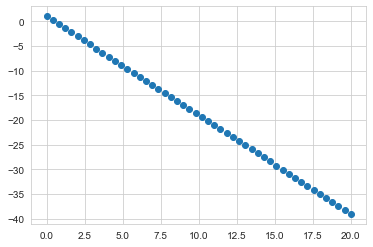

In [5]:
plt.scatter(X,y)

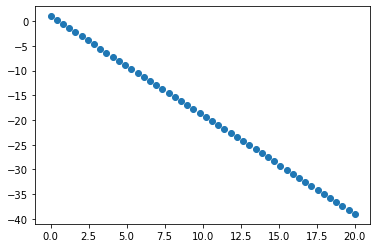

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [6]:
def train(X, y, alpha, epochs):
    theta_0 = 0
    theta_1 = 0
    m = X.shape[0]
    losses = []
    theta_0s = []
    theta_1s = []
    predictions = []
    for i in range(epochs):
        #print("-----------------ITERATION {}----------------".format(i))
        hx = theta_0 + theta_1*X
        error = hx - y
        loss = np.dot(error,error)/(2*m)
        grad0 = np.sum(error)/m
        grad1 = np.dot(error,X)/m
        theta_0s.append(theta_0)
        theta_1s.append(theta_1)
        losses.append(loss)
        predictions.append(hx)
        if i > 0 and losses[i-1] - loss < 0.001:
            break
        if np.linalg.norm([grad0, grad1]) < 0.001:
            break
        theta_0 = theta_0 - alpha*grad0
        theta_1 = theta_1 - alpha*grad1
    return losses, theta_0s, theta_1s, predictions


In [7]:
losses, thatas_0, thatas_1, hxs = train(X,y,0.0005,300)

In [8]:
losses

[249.88775510204084,
 217.2114267068664,
 188.810851451214,
 164.12653903114239,
 142.67220949672134,
 124.02521354011064,
 107.81820630688333,
 93.73191070472954,
 81.48882764676846,
 70.8477693213015,
 61.59910779345569,
 53.56064533619978,
 46.57402513628042,
 40.50161166600819,
 35.22377926423737,
 30.636555511602218,
 26.649572974516655,
 23.184288967307374,
 20.17243826180559,
 17.55468826278626,
 15.27947015621961,
 13.301963003962621,
 11.583210771562774,
 10.089354894627085,
 8.79096726531895,
 7.662470498820969,
 6.681634059016715,
 5.829136317070704,
 5.088183915463236,
 4.444180938954126,
 3.884441375145325,
 3.3979392001174267,
 2.9750911658286117,
 2.607568010189226,
 2.2881303706516554,
 2.0104861688142033,
 1.769166656516655,
 1.5594186815363502,
 1.3771110505197022,
 1.2186531444994224,
 1.0809241837237722,
 0.9612117483153585,
 0.8571583436168518,
 0.7667149575612631,
 0.6881006951473395,
 0.6197676948194081,
 0.5603706356046168,
 0.508740234298391,
 0.463860210592792

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.12969387


Gradient Vector Norm:
3.150846624874574

theta_0_new : -0.13151756202565473
theta_1_new : -1.8941776723448396

****************** Iteration 64 ********************

h(x):
[ -0.13151756  -0.90465131  -1.67778505  -2.45091879  -3.22405254
  -3.99718628  -4.77032002  -5.54345377  -6.31658751  -7.08972126
  -7.862855    -8.63598874  -9.40912249 -10.18225623 -10.95538998
 -11.72852372 -12.50165746 -13.27479121 -14.04792495 -14.82105869
 -15.59419244 -16.36732618 -17.14045993 -17.91359367 -18.68672741
 -19.45986116 -20.2329949  -21.00612865 -21.77926239 -22.55239613
 -23.32552988 -24.09866362 -24.87179736 -25.64493111 -26.41806485
 -27.1911986  -27.96433234 -28.73746608 -29.51059983 -30.28373357
 -31.05686731 -31.83000106 -32.6031348  -33.37626855 -34.14940229
 -34.92253603 -35.69566978 -36.46880352 -37.24193727 -38.01507101]

Error Vector:
[-1.13151756 -1.08832478 -1.04513199 -1.0019392  -0.95874641 -0.91555363
 -0.87236084 -0.82916805 -0.78597527 -0.74278248 -0.69958969 -0.65639691
 -0.61

#### Calculate r2 score

In [9]:
from sklearn.metrics import r2_score

In [10]:
r2_score(y,hxs[-1])

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

In [11]:
def plot(x, y):
    plt.figure(figsize=(10,8))
    plt.plot(x,y, color='purple', marker='o', linestyle='-')
    

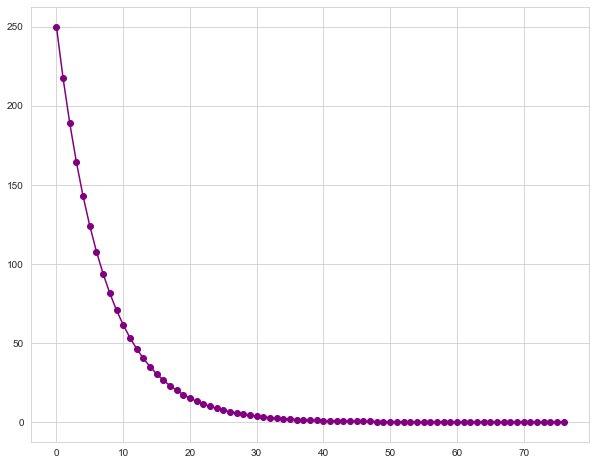

In [12]:
plot(np.arange(0,len(losses)), losses)

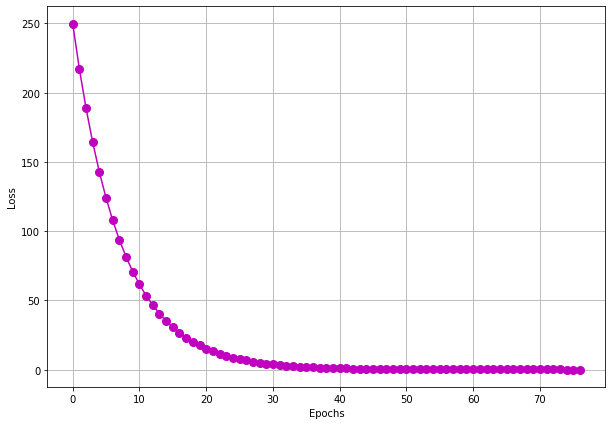

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

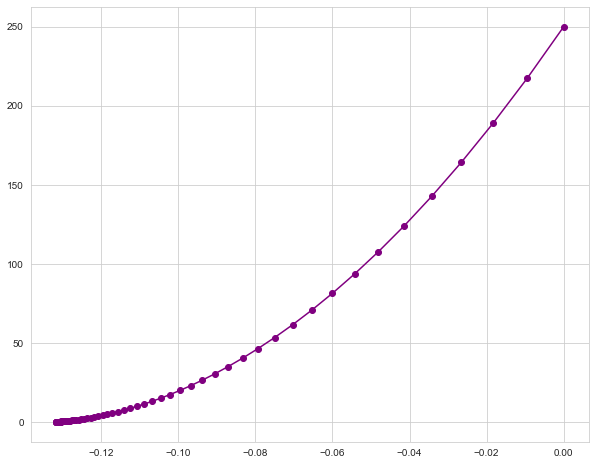

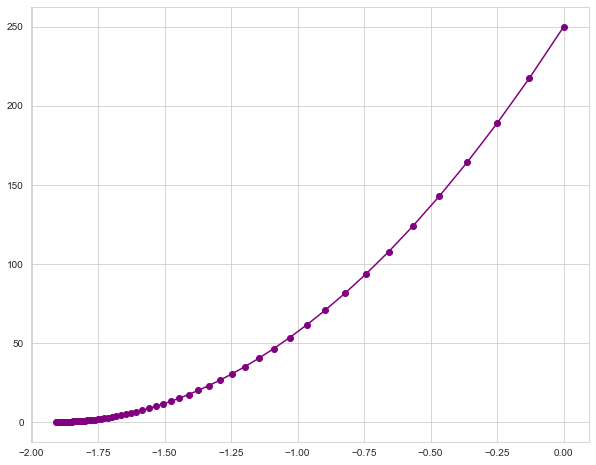

In [13]:
plot(thatas_0,losses)
plot(thatas_1,losses)

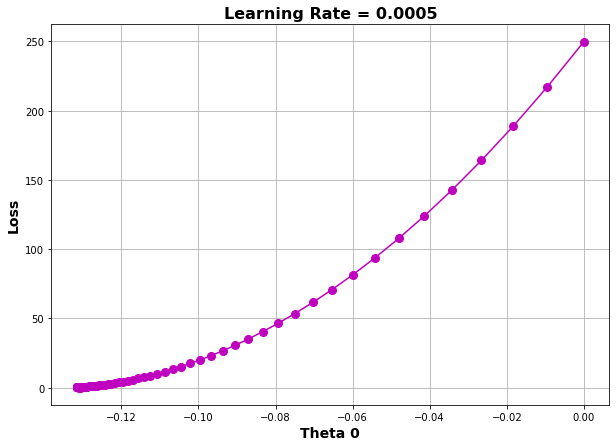

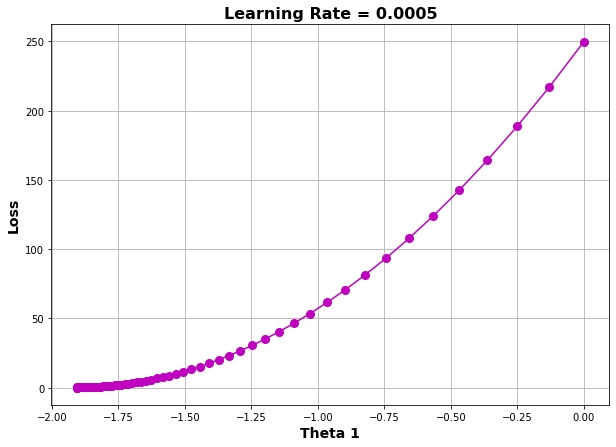

#### Plot all regression lines till converge

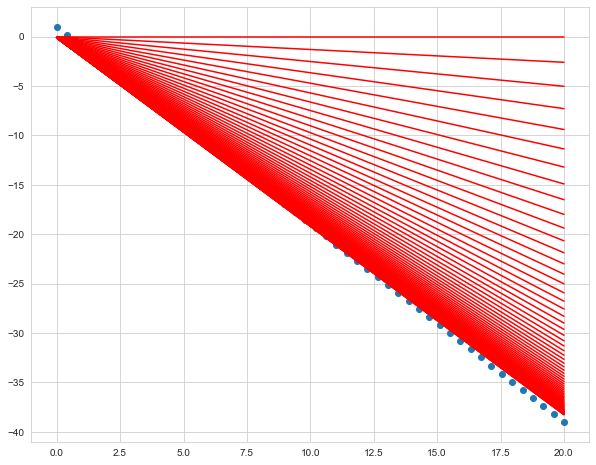

In [14]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
for i in range(len(hxs)):
    plt.plot(X,hxs[i], color='red');

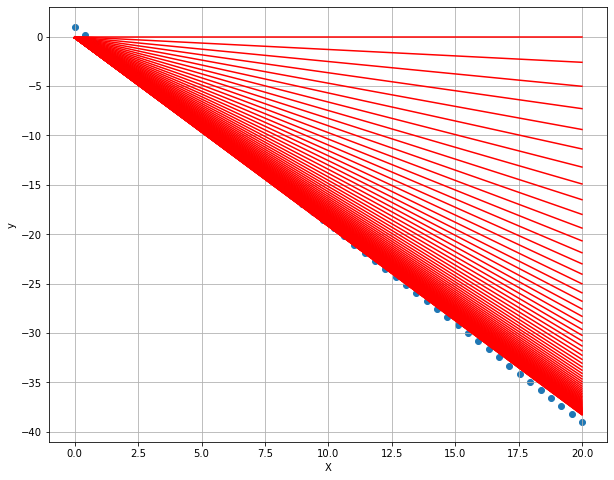

#### Plot the best regression line

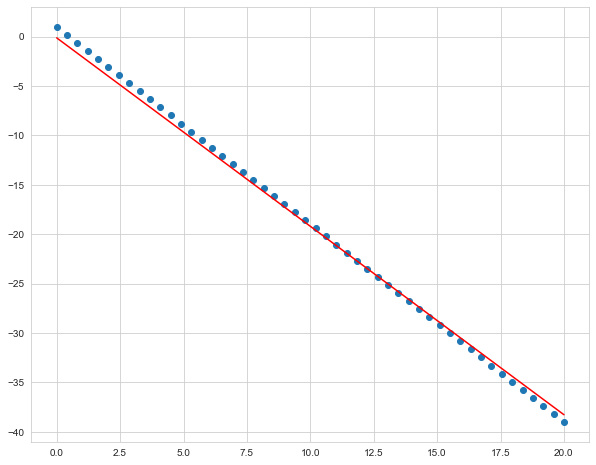

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(X,y)
plt.plot(X,hxs[-1], color='red');

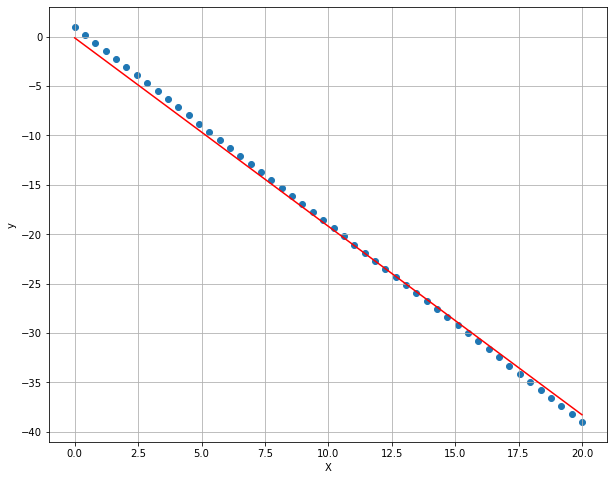

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [16]:
losses, thatas_0, thatas_1, hxs = train(X,y,0.00005,1000)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693


Error Vector:
[-1.03616786 -0.42185497  0.19245793  0.80677082  1.42108371  2.0353966
  2.64970949  3.26402238  3.87833527  4.49264817  5.10696106  5.72127395
  6.33558684  6.94989973  7.56421262  8.17852551  8.79283841  9.4071513
 10.02146419 10.63577708 11.25008997 11.86440286 12.47871575 13.09302865
 13.70734154 14.32165443 14.93596732 15.55028021 16.1645931  16.77890599
 17.39321889 18.00753178 18.62184467 19.23615756 19.85047045 20.46478334
 21.07909623 21.69340913 22.30772202 22.92203491 23.5363478  24.15066069
 24.76497358 25.37928647 25.99359937 26.60791226 27.22222515 27.83653804
 28.45085093 29.06516382]

j = 137.49780357676352

Gradient Vector:
[[ 14.01449798]
 [192.36157561]]

Gradient Vector Norm:
192.8714129238948

theta_0_new : -0.03686858155519533
theta_1_new : -0.5045514947736295

****************** Iteration 45 ********************

h(x):
[ -0.03686858  -0.24280797  -0.44874735  -0.65468674  -0.86062612
  -1.06656551  -1.2725049   -1.47844428  -1.68438367  -1.8903230


j = 68.83712790496376

Gradient Vector:
[[  9.82460151]
 [136.03098233]]

Gradient Vector Norm:
136.3853032673908

theta_0_new : -0.06685086270355442
theta_1_new : -0.9177054348813832

****************** Iteration 96 ********************

h(x):
[ -0.06685086  -0.44142451  -0.81599816  -1.1905718   -1.56514545
  -1.9397191   -2.31429274  -2.68886639  -3.06344004  -3.43801368
  -3.81258733  -4.18716098  -4.56173463  -4.93630827  -5.31088192
  -5.68545557  -6.06002921  -6.43460286  -6.80917651  -7.18375015
  -7.5583238   -7.93289745  -8.30747109  -8.68204474  -9.05661839
  -9.43119203  -9.80576568 -10.18033933 -10.55491298 -10.92948662
 -11.30406027 -11.67863392 -12.05320756 -12.42778121 -12.80235486
 -13.1769285  -13.55150215 -13.9260758  -14.30064944 -14.67522309
 -15.04979674 -15.42437039 -15.79894403 -16.17351768 -16.54809133
 -16.92266497 -17.29723862 -17.67181227 -18.04638591 -18.42095956]

Error Vector:
[-1.06685086 -0.62509798 -0.1833451   0.25840779  0.70016067  1.14191356
  1.5


j = 31.81571190585062

Gradient Vector:
[[ 6.57608066]
 [92.35572627]]

Gradient Vector Norm:
92.58955130845696

theta_0_new : -0.08984261951516516
theta_1_new : -1.238058338321551

****************** Iteration 153 ********************

h(x):
[ -0.08984262  -0.59517255  -1.10050249  -1.60583242  -2.11116236
  -2.61649229  -3.12182222  -3.62715216  -4.13248209  -4.63781203
  -5.14314196  -5.64847189  -6.15380183  -6.65913176  -7.1644617
  -7.66979163  -8.17512156  -8.6804515   -9.18578143  -9.69111137
 -10.1964413  -10.70177123 -11.20710117 -11.7124311  -12.21776104
 -12.72309097 -13.2284209  -13.73375084 -14.23908077 -14.74441071
 -15.24974064 -15.75507057 -16.26040051 -16.76573044 -17.27106038
 -17.77639031 -18.28172024 -18.78705018 -19.29238011 -19.79771005
 -20.30303998 -20.80836991 -21.31369985 -21.81902978 -22.32435972
 -22.82968965 -23.33501958 -23.84034952 -24.34567945 -24.85100939]

Error Vector:
[-1.08984262 -0.77884602 -0.46784943 -0.15685283  0.15414377  0.46514036
  0.7761

h(x):
[ -0.10315948  -0.68542902  -1.26769856  -1.8499681   -2.43223764
  -3.01450718  -3.59677672  -4.17904625  -4.76131579  -5.34358533
  -5.92585487  -6.50812441  -7.09039395  -7.67266349  -8.25493303
  -8.83720257  -9.41947211 -10.00174165 -10.58401118 -11.16628072
 -11.74855026 -12.3308198  -12.91308934 -13.49535888 -14.07762842
 -14.65989796 -15.2421675  -15.82443704 -16.40670658 -16.98897611
 -17.57124565 -18.15351519 -18.73578473 -19.31805427 -19.90032381
 -20.48259335 -21.06486289 -21.64713243 -22.22940197 -22.81167151
 -23.39394104 -23.97621058 -24.55848012 -25.14074966 -25.7230192
 -26.30528874 -26.88755828 -27.46982782 -28.05209736 -28.6343669 ]

Error Vector:
[-1.10315948 -0.86910249 -0.6350455  -0.40098851 -0.16693152  0.06712548
  0.30118247  0.53523946  0.76929645  1.00335344  1.23741043  1.47146743
  1.70552442  1.93958141  2.1736384   2.40769539  2.64175238  2.87580937
  3.10986637  3.34392336  3.57798035  3.81203734  4.04609433  4.28015132
  4.51420832  4.74826531  4

Error Vector:
[-1.11337893 -0.93966527 -0.76595161 -0.59223795 -0.41852429 -0.24481063
 -0.07109696  0.1026167   0.27633036  0.45004402  0.62375768  0.79747134
  0.971185    1.14489866  1.31861232  1.49232598  1.66603965  1.83975331
  2.01346697  2.18718063  2.36089429  2.53460795  2.70832161  2.88203527
  3.05574893  3.22946259  3.40317626  3.57688992  3.75060358  3.92431724
  4.0980309   4.27174456  4.44545822  4.61917188  4.79288554  4.9665992
  5.14031287  5.31402653  5.48774019  5.66145385  5.83516751  6.00888117
  6.18259483  6.35630849  6.53002215  6.70373581  6.87744948  7.05116314
  7.2248768   7.39859046]

j = 8.08010689404443

Gradient Vector:
[[ 3.14260576]
 [46.19171882]]

Gradient Vector Norm:
46.29849737188856

theta_0_new : -0.11353606105419035
theta_1_new : -1.5767111164794902

****************** Iteration 255 ********************

h(x):
[ -0.11353606  -0.75709162  -1.40064718  -2.04420273  -2.68775829
  -3.33131385  -3.97486941  -4.61842497  -5.26198052  -5.90553608
 

theta_0_new : -0.12177000204725738
theta_1_new : -1.7006104572918064

****************** Iteration 322 ********************

h(x):
[ -0.12177     -0.81589672  -1.51002344  -2.20415015  -2.89827687
  -3.59240359  -4.28653031  -4.98065702  -5.67478374  -6.36891046
  -7.06303717  -7.75716389  -8.45129061  -9.14541733  -9.83954404
 -10.53367076 -11.22779748 -11.9219242  -12.61605091 -13.31017763
 -14.00430435 -14.69843106 -15.39255778 -16.0866845  -16.78081122
 -17.47493793 -18.16906465 -18.86319137 -19.55731809 -20.2514448
 -20.94557152 -21.63969824 -22.33382495 -23.02795167 -23.72207839
 -24.41620511 -25.11033182 -25.80445854 -26.49858526 -27.19271198
 -27.88683869 -28.58096541 -29.27509213 -29.96921884 -30.66334556
 -31.35747228 -32.051599   -32.74572571 -33.43985243 -34.13397915]

Error Vector:
[-1.12177    -0.99957019 -0.87737038 -0.75517056 -0.63297075 -0.51077094
 -0.38857112 -0.26637131 -0.1441715  -0.02197168  0.10022813  0.22242794
  0.34462776  0.46682757  0.58902738  0.7112272 


Error Vector:
[-1.12545257 -1.02723783 -0.92902308 -0.83080834 -0.7325936  -0.63437885
 -0.53616411 -0.43794937 -0.33973462 -0.24151988 -0.14330514 -0.04509039
  0.05312435  0.15133909  0.24955384  0.34776858  0.44598332  0.54419807
  0.64241281  0.74062755  0.8388423   0.93705704  1.03527178  1.13348653
  1.23170127  1.32991601  1.42813076  1.5263455   1.62456024  1.72277499
  1.82098973  1.91920447  2.01741922  2.11563396  2.2138487   2.31206345
  2.41027819  2.50849293  2.60670768  2.70492242  2.80313716  2.90135191
  2.99956665  3.09778139  3.19599614  3.29421088  3.39242562  3.49064037
  3.58885511  3.68706985]

j = 1.8246392779177878

Gradient Vector:
[[ 1.28080864]
 [21.15633959]]

Gradient Vector Norm:
21.195074327352817

theta_0_new : -0.1255166095763225
theta_1_new : -1.7604316959298962

****************** Iteration 370 ********************

h(x):
[ -0.12551661  -0.84406016  -1.56260371  -2.28114726  -2.99969081
  -3.71823436  -4.43677791  -5.15532146  -5.873865    -6.592408

theta_0_new : -0.12838891843775904
theta_1_new : -1.81026389922397

****************** Iteration 427 ********************

h(x):
[ -0.12838892  -0.86727214  -1.60615537  -2.34503859  -3.08392182
  -3.82280504  -4.56168826  -5.30057149  -6.03945471  -6.77833794
  -7.51722116  -8.25610438  -8.99498761  -9.73387083 -10.47275406
 -11.21163728 -11.95052051 -12.68940373 -13.42828695 -14.16717018
 -14.9060534  -15.64493663 -16.38381985 -17.12270307 -17.8615863
 -18.60046952 -19.33935275 -20.07823597 -20.8171192  -21.55600242
 -22.29488564 -23.03376887 -23.77265209 -24.51153532 -25.25041854
 -25.98930176 -26.72818499 -27.46706821 -28.20595144 -28.94483466
 -29.68371789 -30.42260111 -31.16148433 -31.90036756 -32.63925078
 -33.37813401 -34.11701723 -34.85590045 -35.59478368 -36.3336669 ]

Error Vector:
[-1.12838892 -1.05094561 -0.97350231 -0.896059   -0.81861569 -0.74117239
 -0.66372908 -0.58628577 -0.50884247 -0.43139916 -0.35395585 -0.27651255
 -0.19906924 -0.12162593 -0.04418263  0.03326068  


Gradient Vector Norm:
9.705665950069054

theta_0_new : -0.13009444831874967
theta_1_new : -1.8445985880847027

****************** Iteration 485 ********************

h(x):
[ -0.13009445  -0.88299183  -1.63588921  -2.3887866   -3.14168398
  -3.89458136  -4.64747875  -5.40037613  -6.15327351  -6.90617089
  -7.65906828  -8.41196566  -9.16486304  -9.91776043 -10.67065781
 -11.42355519 -12.17645257 -12.92934996 -13.68224734 -14.43514472
 -15.18804211 -15.94093949 -16.69383687 -17.44673425 -18.19963164
 -18.95252902 -19.7054264  -20.45832379 -21.21122117 -21.96411855
 -22.71701594 -23.46991332 -24.2228107  -24.97570808 -25.72860547
 -26.48150285 -27.23440023 -27.98729762 -28.740195   -29.49309238
 -30.24598976 -30.99888715 -31.75178453 -32.50468191 -33.2575793
 -34.01047668 -34.76337406 -35.51627144 -36.26916883 -37.02206621]

Error Vector:
[-1.13009445 -1.0666653  -1.00323615 -0.93980701 -0.87637786 -0.81294871
 -0.74951956 -0.68609041 -0.62266127 -0.55923212 -0.49580297 -0.43237382
 -0.36


Error Vector:
[-1.13097983e+00 -1.07714118e+00 -1.02330254e+00 -9.69463898e-01
 -9.15625255e-01 -8.61786611e-01 -8.07947968e-01 -7.54109325e-01
 -7.00270682e-01 -6.46432038e-01 -5.92593395e-01 -5.38754752e-01
 -4.84916109e-01 -4.31077465e-01 -3.77238822e-01 -3.23400179e-01
 -2.69561536e-01 -2.15722892e-01 -1.61884249e-01 -1.08045606e-01
 -5.42069626e-02 -3.68319395e-04  5.34703239e-02  1.07308967e-01
  1.61147610e-01  2.14986254e-01  2.68824897e-01  3.22663540e-01
  3.76502183e-01  4.30340827e-01  4.84179470e-01  5.38018113e-01
  5.91856756e-01  6.45695400e-01  6.99534043e-01  7.53372686e-01
  8.07211329e-01  8.61049973e-01  9.14888616e-01  9.68727259e-01
  1.02256590e+00  1.07640455e+00  1.13024319e+00  1.18408183e+00
  1.23792048e+00  1.29175912e+00  1.34559776e+00  1.39943641e+00
  1.45327505e+00  1.50711369e+00]

j = 0.31950125912269717

Gradient Vector:
[[0.18806693]
 [6.456954  ]]

Gradient Vector Norm:
6.459692258812109

theta_0_new : -0.1309892309985654
theta_1_new : -1.868418

In [17]:
r2_score(y,hxs[-1])

0.9965793400861428

r2_score: 0.9965793400861428


In [18]:
def plot_all():
    plt.figure(figsize=(10,8))
    plot(np.arange(0,len(losses)),losses)
    plot(thatas_0,losses)
    plot(thatas_1,losses)
    plt.show()
    plt.figure(figsize=(10,8))
    plt.scatter(X,y)
    for i in range(len(hxs)):
        plt.plot(X,hxs[i], color='red')
    plt.show()
    plt.figure(figsize=(10,8))
    plt.scatter(X,y)
    plt.plot(X,hxs[-1], color='red');

<Figure size 720x576 with 0 Axes>

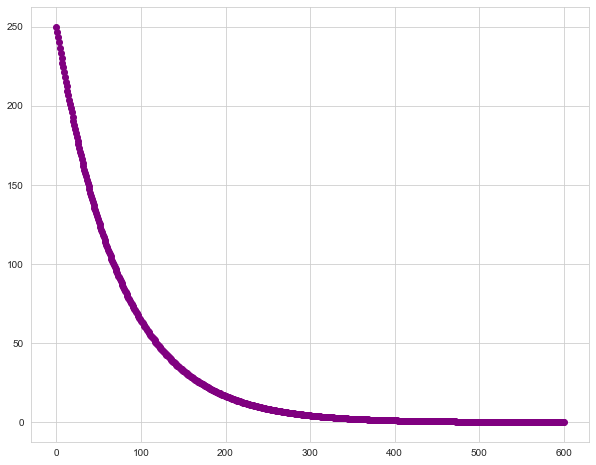

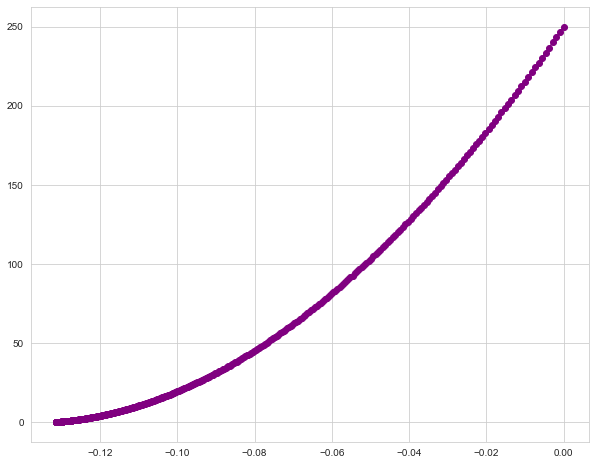

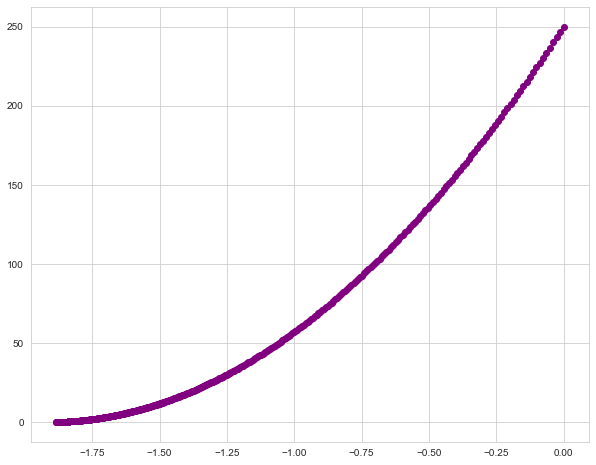

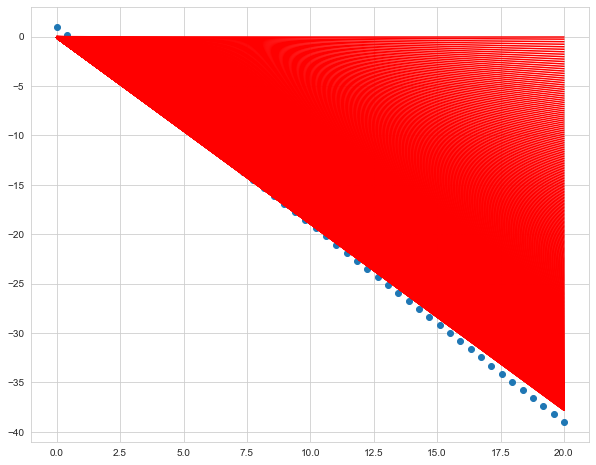

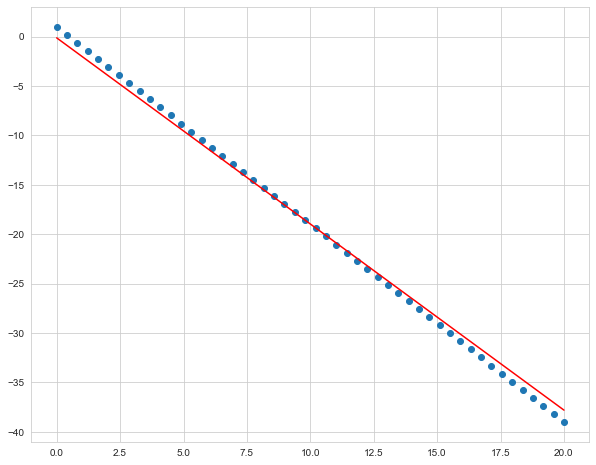

In [19]:
plot_all()

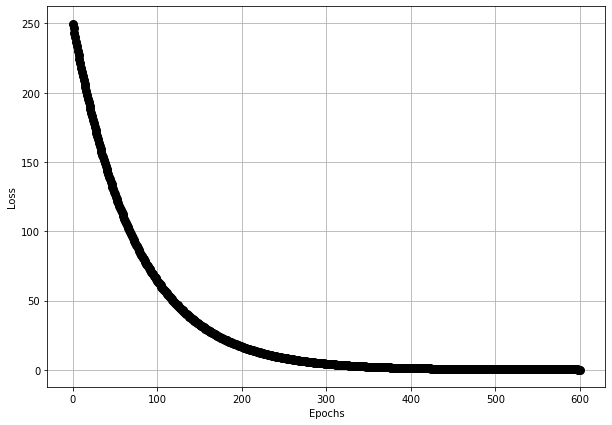

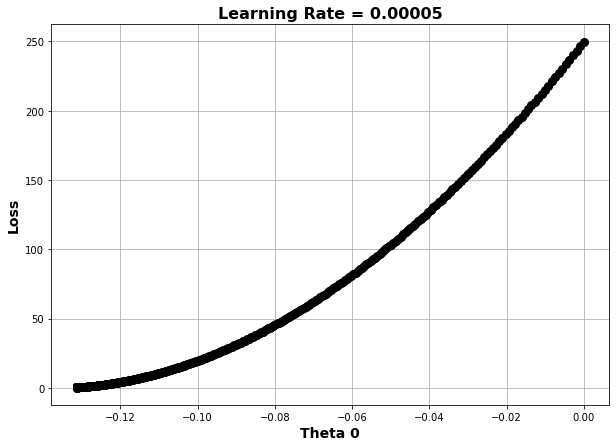

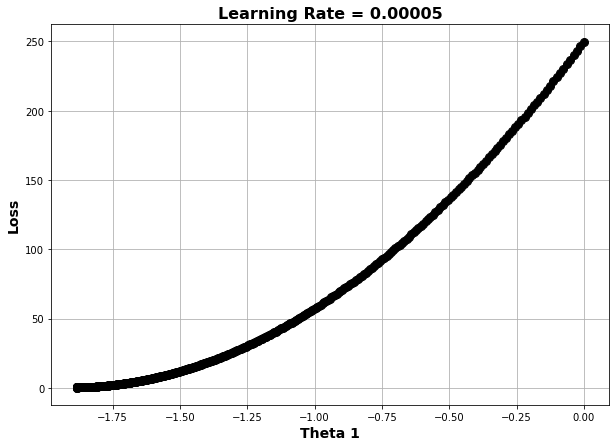

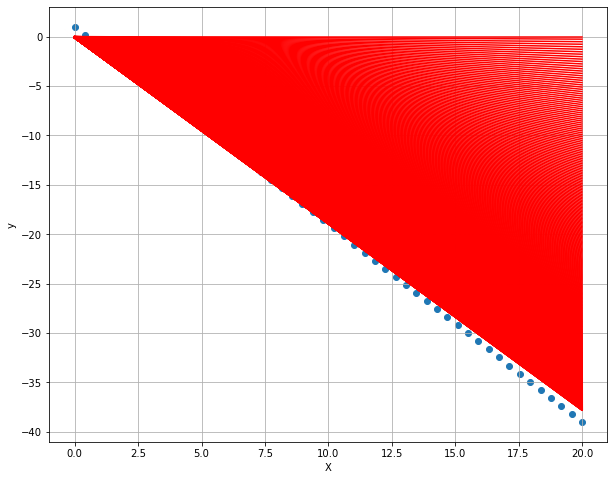

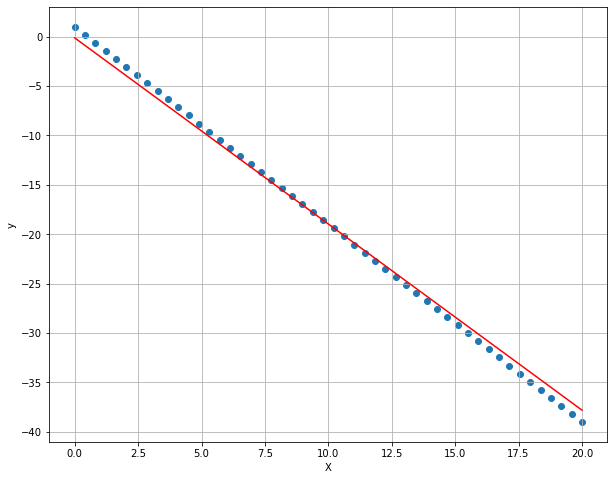

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [20]:
losses, thatas_0, thatas_1, hxs = train(X,y,0.005,300)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.296938775

In [21]:
r2_score(y,hxs[-1])

0.9976200723230484

r2_score: 0.9976200723230484


<Figure size 720x576 with 0 Axes>

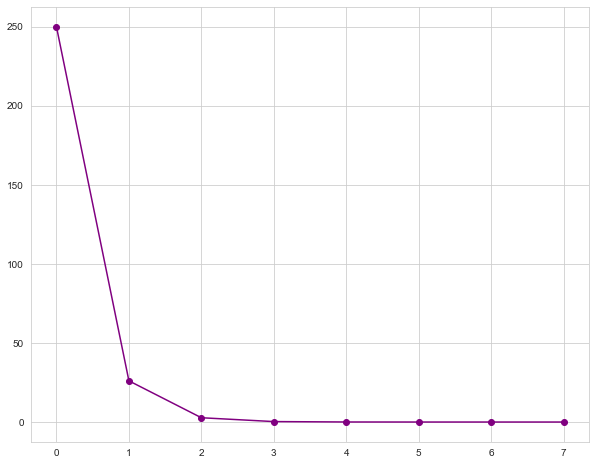

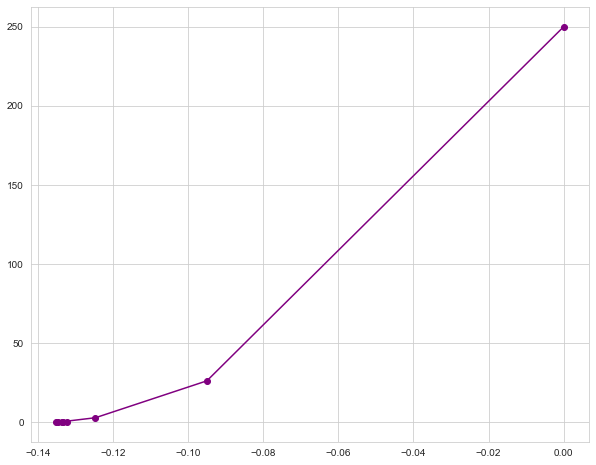

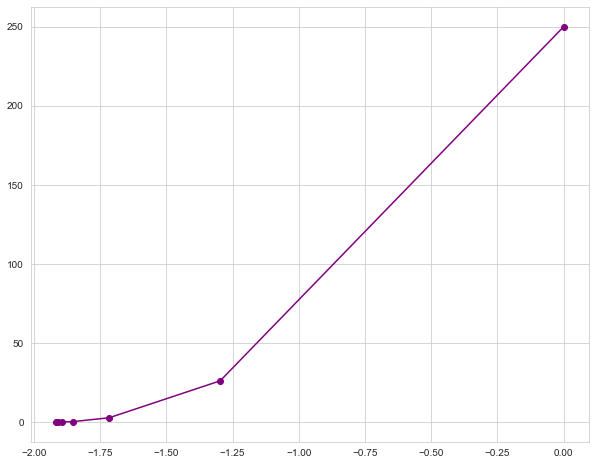

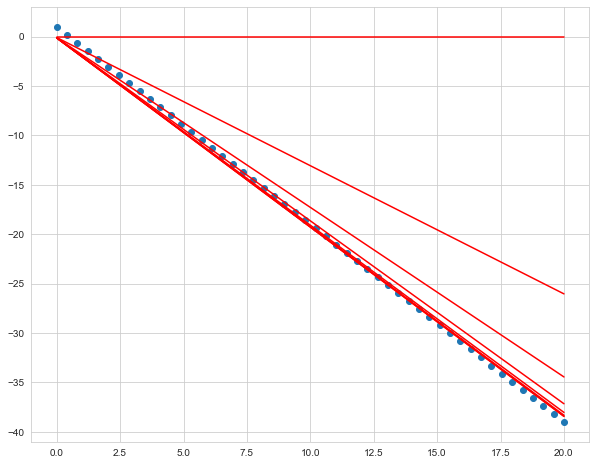

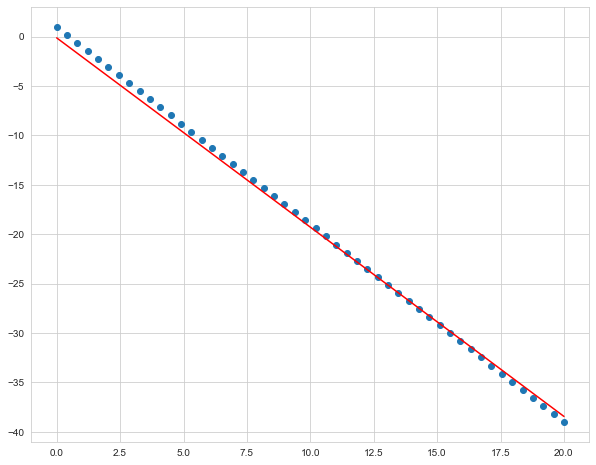

In [22]:
plot_all()

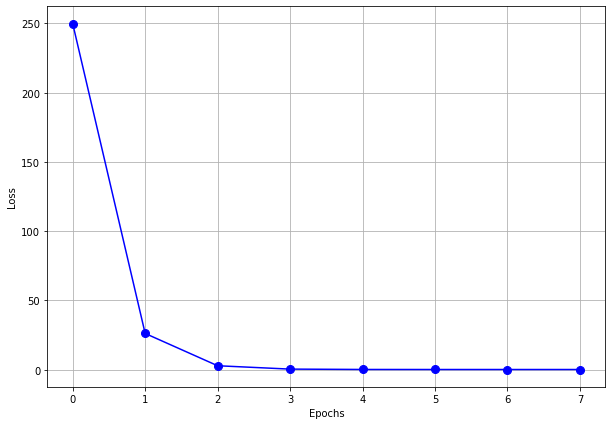

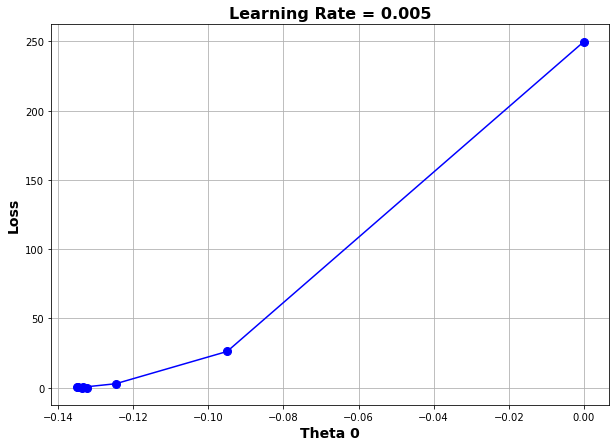

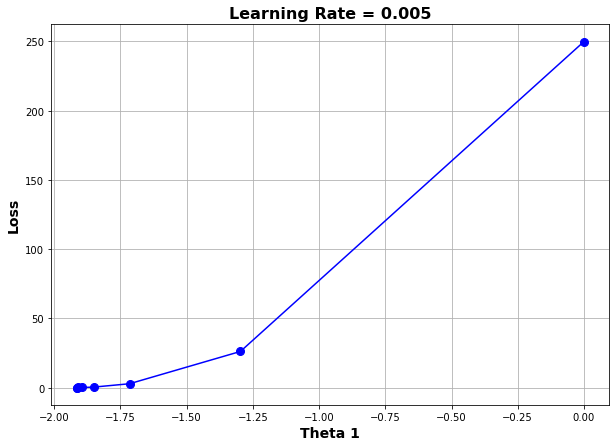

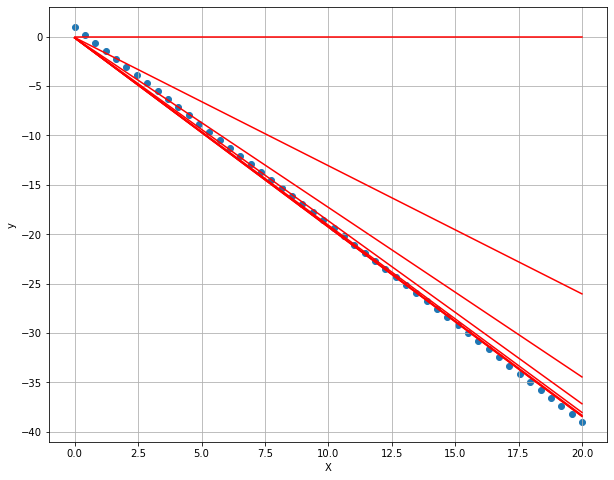

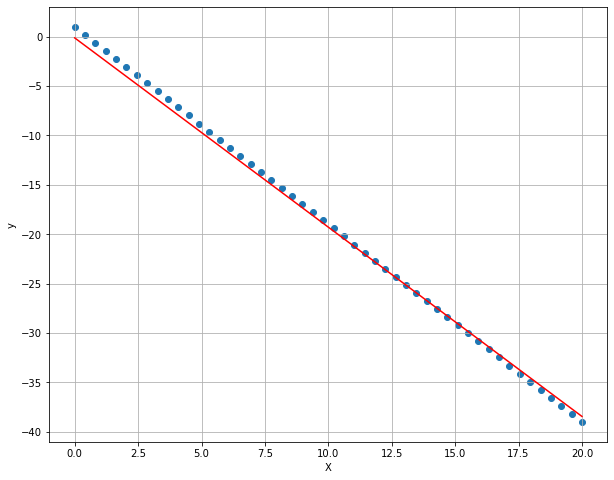

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [134]:
def train(X, y, alpha, epochs):
    theta_0 = 0
    theta_1 = 0
    m = X.shape[0]
    losses = []
    theta_0s = []
    theta_1s = []
    predictions = []
    b = True
    loss = 0
    for i in range(epochs):
        data = np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
        np.random.shuffle(data)
        X_t = data[:,0]
        y_t = data[:,1]
        for j in range (0,m):
            X_batch = X_t[j]
            y_batch = y_t[j]
            hx = theta_0 + theta_1*X_batch
            error = hx - y_batch
            loss = (error*error)/(2)
            print(loss)
            grad0 = error
            grad1 = error*X_batch
            theta_0s.append(theta_0)
            theta_1s.append(theta_1)
            losses.append(loss)
            
            theta_0 -= alpha*grad0
            theta_1 -= alpha*grad1
        hx = theta_0 + np.dot(X, theta_1)
        if np.linalg.norm([grad0,grad1]) < 0.01:
            break
        if abs(losses[i*m] - losses[-1]) < 0.01:
            break
        predictions.append(hx)
    return losses, theta_0s, theta_1s, predictions


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [98]:
losses, thatas_0, thatas_1, hxs = train(X,y,0.0005,300)

667.9885464389838
115.70654711512559
95.61946211274491
13.317278413256627
0.08832985895893265
63.47132716775157
18.697750174623753
0.5448191526854596
0.2644994181812104
1.817351408259788
119.4157131763348
34.87798225232226
84.74867336364883
81.82628012893187
5.412626377501973
45.424914181240574
122.38392212623036
179.7204945572848
0.8438037709612937
14.499350475343832
17.318728955996693
58.54727071445997
64.00979219146771
3.4163207205652526
39.912160955769316
3.767570782745525
26.633392937213934
9.95116515110373
0.03806959172118028
0.002825984957727545
19.328690371489127
0.5158840990187846
0.8480886167615432
14.999998727966783
0.15673741932001883
7.173046278988662
3.7617736618332467
1.3016375000051401
7.498871449971487
4.426455391531233
1.0210089128509972
0.5800919650284945
3.069115734621685
0.5928255001156478
0.4201581440918075
0.6245686553738123
0.14635662391600862
0.537622293471628
0.4323668103403706
0.15371189675100594
0.0676083680072924
0.10107283362528653
0.0013644509466576769
0.

In [99]:
r2_score(y,hxs[-1])

0.9976316406969543

<Figure size 720x576 with 0 Axes>

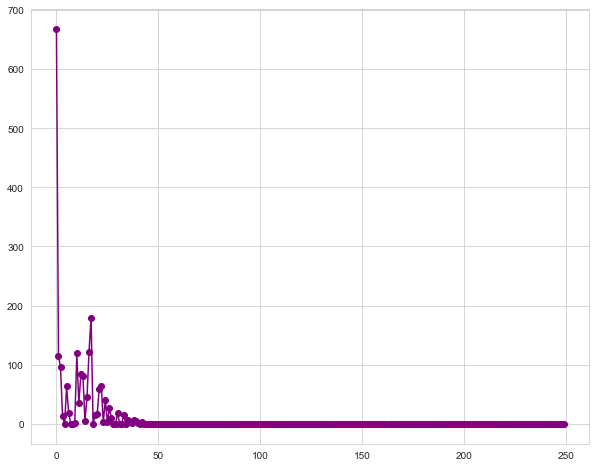

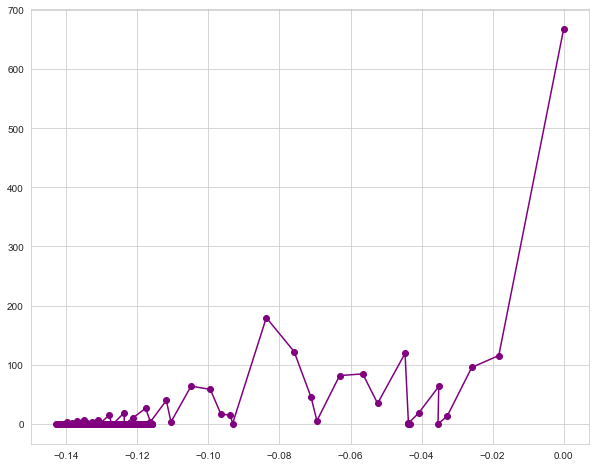

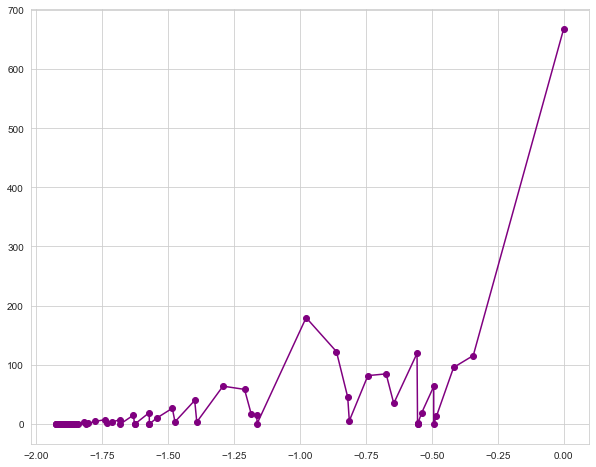

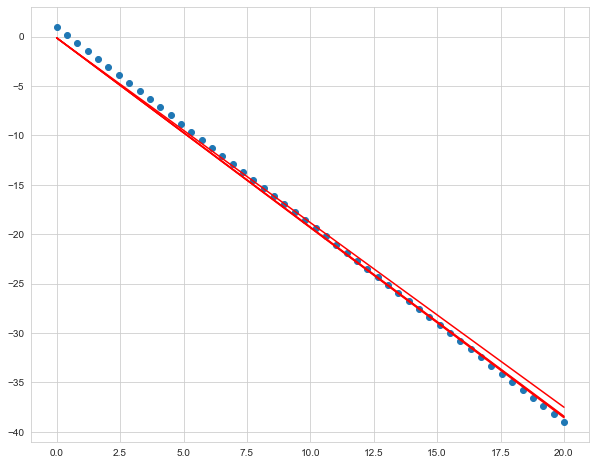

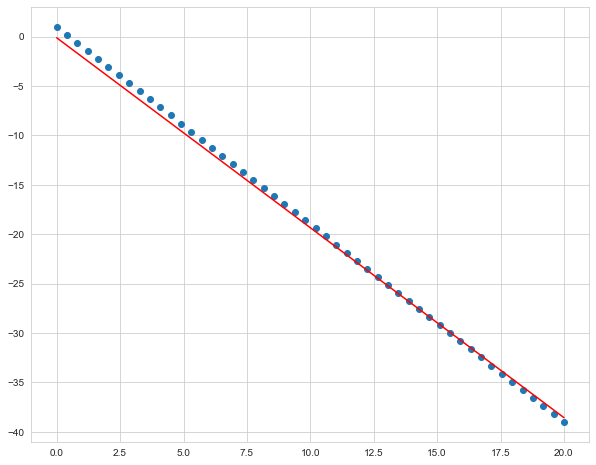

In [100]:
plot_all()

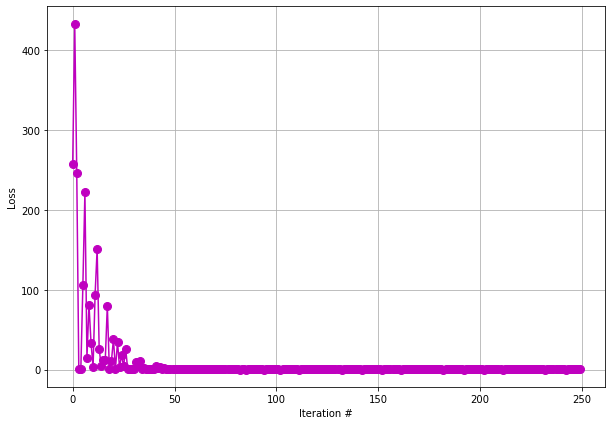

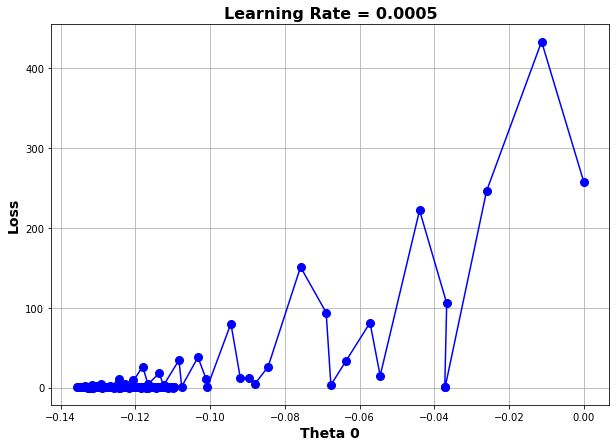

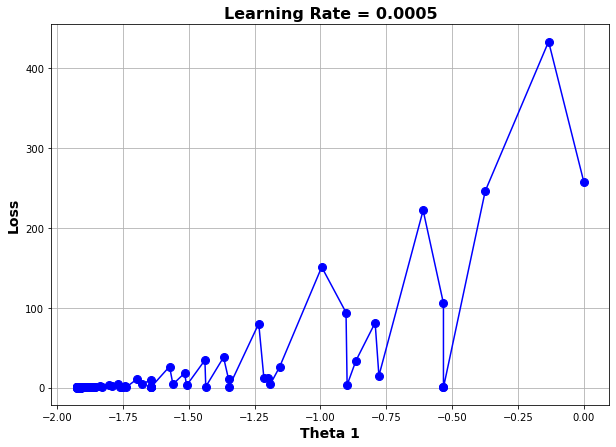

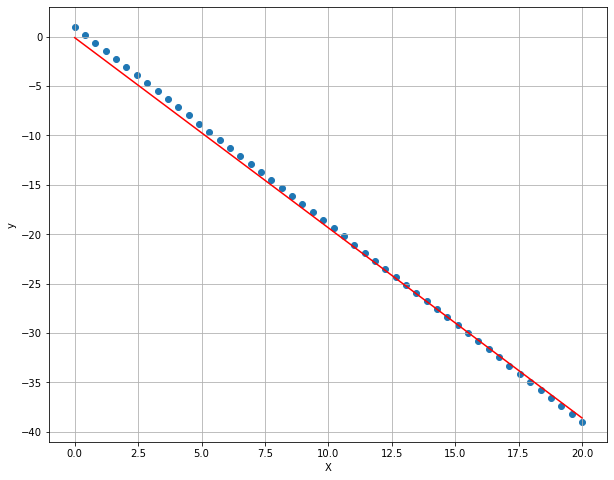

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [33]:
losses, thatas_0, thatas_1, hxs = train(X,y,0.0001,50)

105.27301124531446
332.45260652105213
7.149168267994491
136.67892564763858
0.02309993275591785
683.3117165601923
71.2436337157762
306.70723452284614
0.5134966456773624
25.72138585164608
31.205184450779043
209.7492832536896
19.82461779010803
218.2360141382764
47.80951115068912
14.776660280035479
88.593509915119
396.9677962502651
497.46599651122017
1.3522405265850075
122.84551795368935
100.6293442421995
28.11392814987809
33.05818708638238
365.32060770311267
53.697350876483824
373.21044768753455
170.57717603626088
124.09526191845573
205.7739736465588
98.60814216285026
266.1507665024817
56.93820192758147
189.37772982533775
124.21441393098021
185.22921404840676
0.13048963988197207
300.70130051657645
60.391980113421624
76.5879513070517
4.136220374621776
0.0029712471845931613
23.161527059896738
129.3376121141798
164.81761987571636
209.72086187835595
177.6785769446934
128.7494919294298
0.5746966208631865
1.8590077384928194
122.08595757427892
91.89139479938882
77.60738422611469
5.64733496403860

****************** Epoch 0 ********************

Cost = 16.887127834434082

Gradient Vector:
[[ 5.81156224]
 [37.95305953]]

Gradient Vector Norm:
38.39542919503344

theta_0_new : -0.06824518438278841
theta_1_new : -0.9465294881483106

****************** Epoch 1 ********************

Cost = 3.4768759637568025

Gradient Vector:
[[ 2.63699676]
 [17.22120335]]

Gradient Vector Norm:
17.421928616911465

theta_0_new : -0.10250915532081234
theta_1_new : -1.4273881562733521

****************** Epoch 2 ********************

Cost = 0.5388930377939929

Gradient Vector:
[[1.03816476]
 [6.77985151]]

Gradient Vector Norm:
6.858875464652135

theta_0_new : -0.11904557794809867
theta_1_new : -1.6696771665089043

****************** Epoch 3 ********************

Cost = 0.027171708479479032

Gradient Vector:
[[0.23311675]
 [1.52239507]]

Gradient Vector Norm:
1.5401396595959387

theta_0_new : -0.1266525793929906
theta_1_new : -1.791785322149918

****************** Epoch 4 ********************

Cost = 0.

In [34]:
r2_score(y,hxs[-1])

0.9976978670647091

r2_score =  0.9976210193556192


<Figure size 720x576 with 0 Axes>

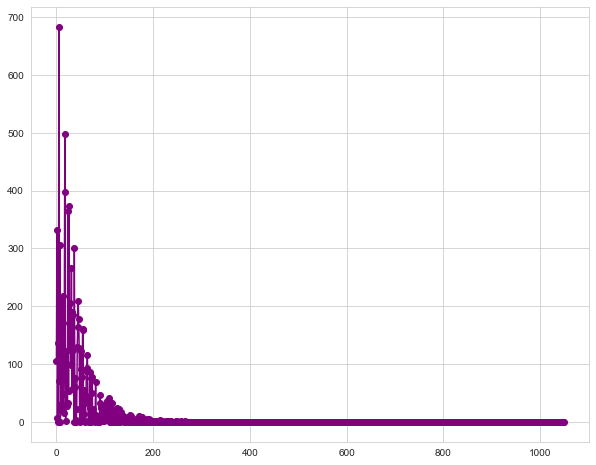

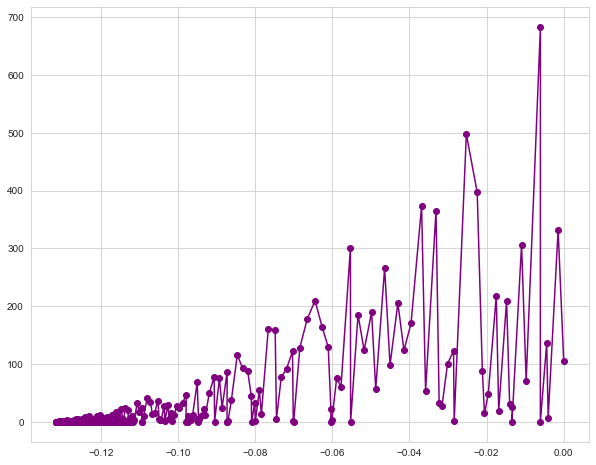

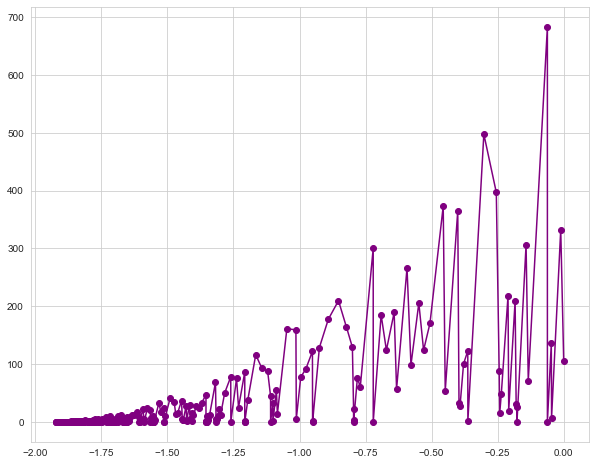

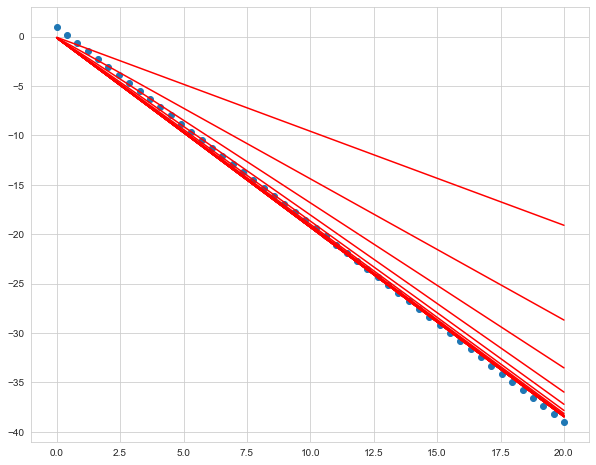

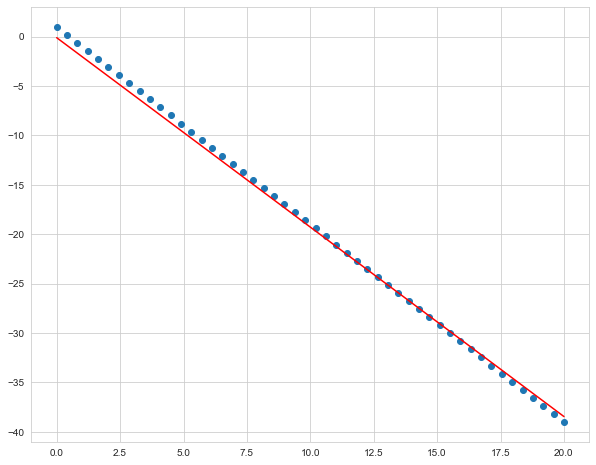

In [35]:
plot_all()

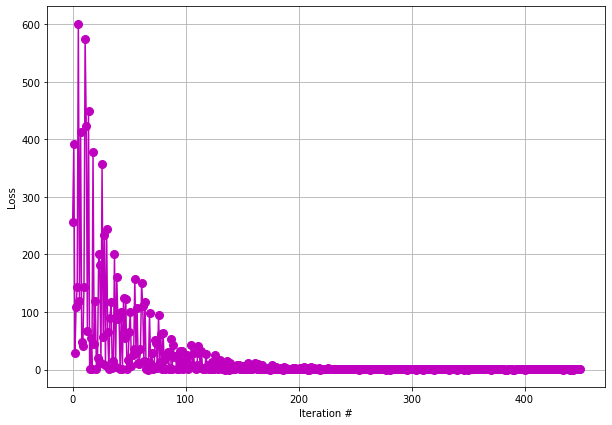

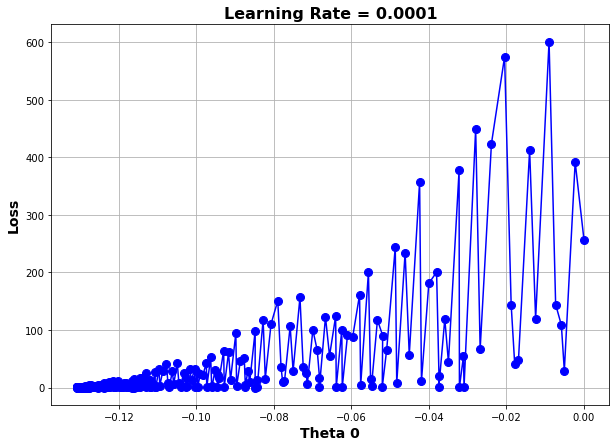

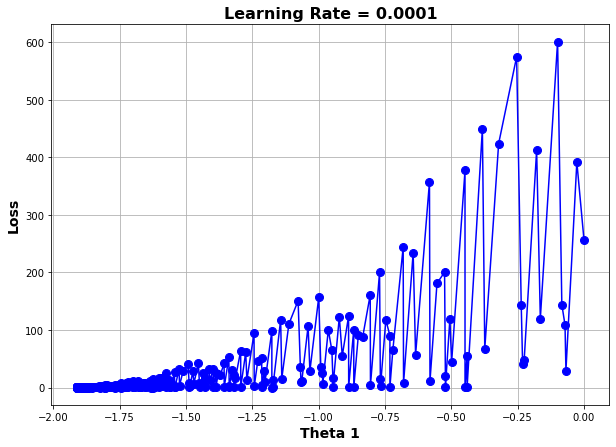

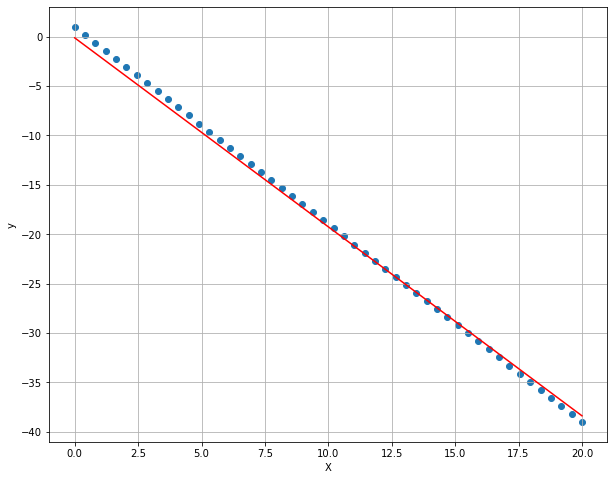

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [36]:
losses, thatas_0, thatas_1, hxs = train(X,y,0.00007,300)

130.29591836734693
1.0310329702005463
19.906005189788996
81.87596992622481
442.3567945521045
149.68015551735243
134.52561276371668
592.0998837055165
2.135667298427603
13.219792927374566
616.2729247427262
246.71566374092777
140.69219892083188
306.57982368033146
5.582673479227841
280.1821873732441
325.16395209365436
539.7574746631493
7.177355343172646
21.350289387760505
233.75008569569
186.475676584743
0.5267554903019069
76.83710176429143
122.91721279159776
204.21194496809971
28.125741219287118
138.69163119850148
37.97535213996041
0.07364428298544368
14.853402182120204
0.03454113009070632
22.705515864872662
2.4208963998581114
292.37179712386086
60.94424045991859
30.636089368442434
149.40741355319196
52.32632539195534
382.4627656703184
301.031623273227
122.82350146633986
390.8057622691996
281.2571737611013
282.4656279328
177.0174948746491
29.28163629599788
213.16920559904503
81.94385192879803
212.8814195555208
3.327778955984073
155.32007050871934
46.904795102352935
37.12529246306004
225.9

****************** Epoch 0 ********************

Cost = 124.0437076336173

Gradient Vector:
[[ 15.75079094]
 [205.72461637]]

Gradient Vector Norm:
206.32669530819234

theta_0_new : -0.051948440276973804
theta_1_new : -0.7135402661206246

****************** Epoch 1 ********************

Cost = 47.548348470307104

Gradient Vector:
[[  9.75175353]
 [127.36984205]]

Gradient Vector Norm:
127.7426058898493

theta_0_new : -0.0848670753436601
theta_1_new : -1.1703212347826775

****************** Epoch 2 ********************

Cost = 18.197486942756615

Gradient Vector:
[[ 6.0328247 ]
 [78.79607774]]

Gradient Vector Norm:
79.02668436189794

theta_0_new : -0.10488561670446958
theta_1_new : -1.453519053721322

****************** Epoch 3 ********************

Cost = 6.946707513134106

Gradient Vector:
[[ 3.72738716]
 [48.68424043]]

Gradient Vector Norm:
48.826720978186586

theta_0_new : -0.11690744458248394
theta_1_new : -1.6291086944831552

****************** Epoch 4 ********************

Cost

In [37]:
r2_score(y,hxs[-1])

0.998586414956427

r2_score =  0.997655146572521


<Figure size 720x576 with 0 Axes>

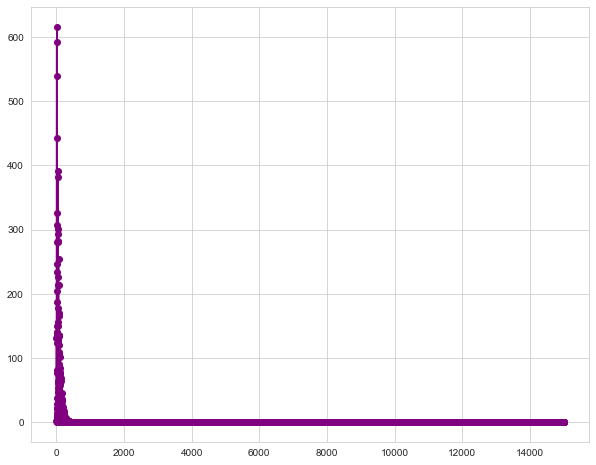

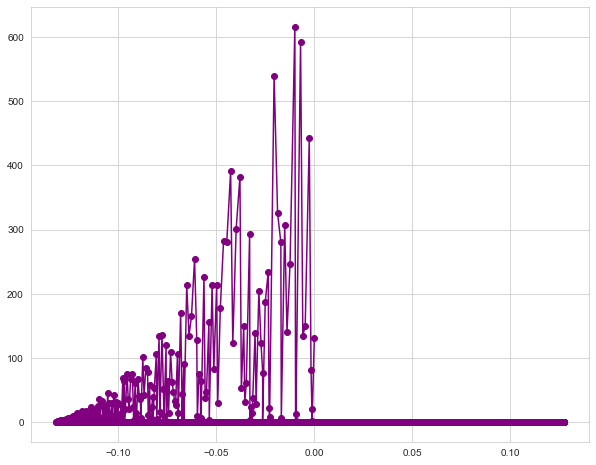

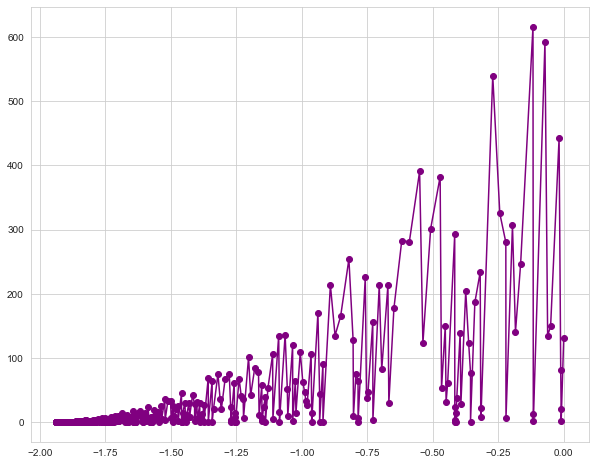

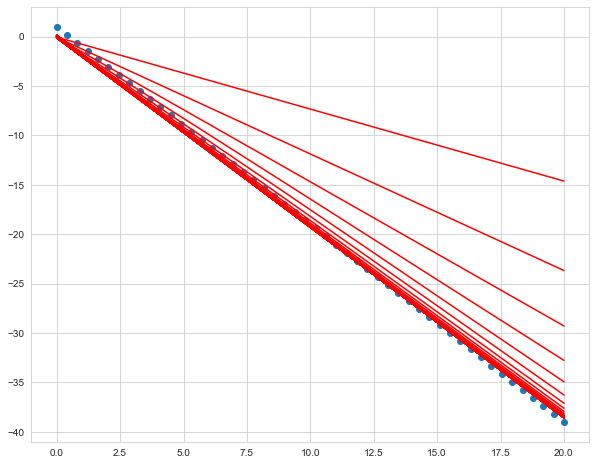

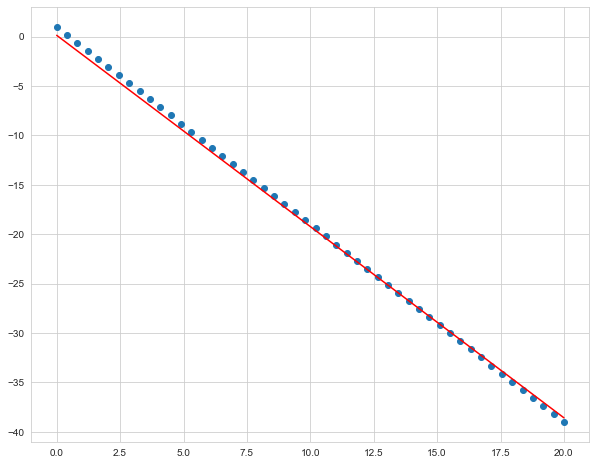

In [38]:
plot_all()

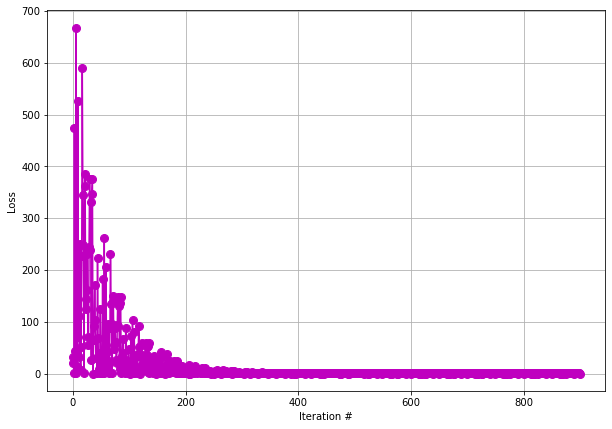

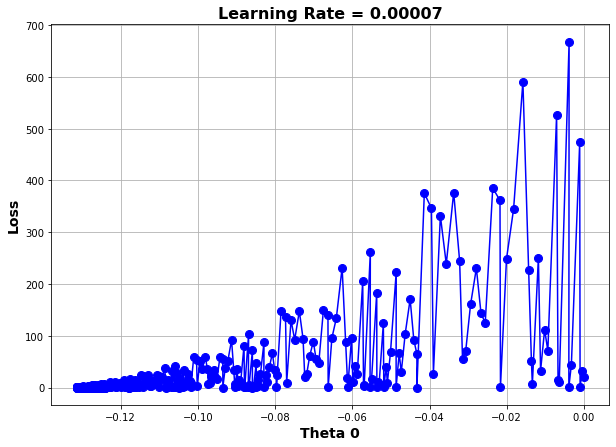

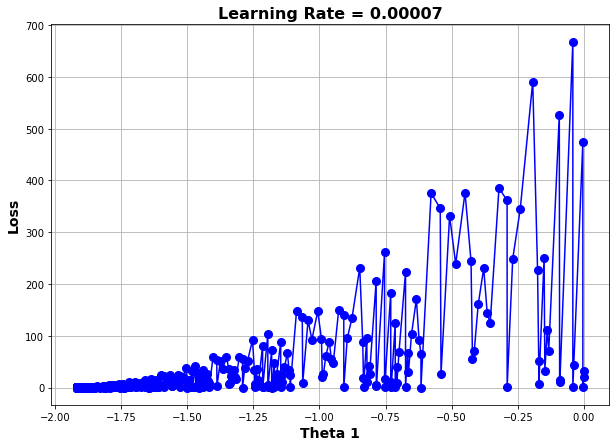

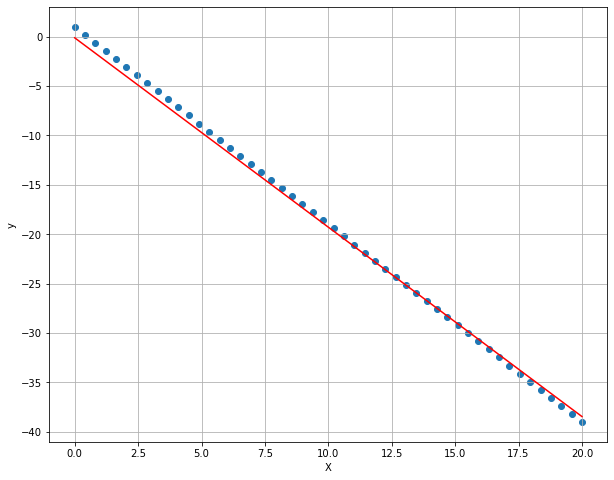

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [39]:
np.random.seed(42)

In [40]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [179]:
def train(X, y, alpha, epochs, bs):
    theta_0 = 0
    theta_1 = 0
    m = X.shape[0]
    losses = []
    theta_0s = []
    theta_1s = []
    predictions = []
    iter = m//bs
    loss = 0
    cnt = 0
    for i in range(epochs):
        loss = 0
        data = np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1)
        np.random.shuffle(data)
        X_t = data[:,0]
        y_t = data[:,1]
        for j in range (0,iter):
            X_batch = X_t[j*bs:(j*bs)+bs]
            y_batch = y_t[j*bs:(j*bs)+bs]
            hx = theta_0 + theta_1*X_batch
            error = hx - y_batch
            loss = np.dot(error,error)/(2*bs)
            #print(loss)
            grad0 = np.sum(error)/bs
            grad1 = np.dot(error,X_batch)/bs
            theta_0s.append(theta_0)
            theta_1s.append(theta_1)
            losses.append(loss)
            theta_0 -= alpha*grad0
            theta_1 -= alpha*grad1
        if np.linalg.norm([grad0,grad1]) < 0.001:
            break
        if abs(losses[i*iter] - loss) < 0.001:
            break
        hx = theta_0 + np.dot(X, theta_1)
        predictions.append(hx)
    return losses, theta_0s, theta_1s, predictions


##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [180]:
losses, thatas_0, thatas_1, hxs = train(X,y,0.0005,8,5)

In [181]:
losses

[319.36047480216575,
 89.17747304039126,
 295.53902633210356,
 130.81439822421308,
 156.28725286045852,
 195.29151283060114,
 63.218399485797626,
 78.8889218805997,
 50.83423652475839,
 73.2364168303239,
 47.304668043692004,
 95.53400156509058,
 15.402497842390034,
 36.471061071335285,
 15.534501333543897,
 58.11993406060807,
 32.422504845643246,
 38.881888204940495,
 14.664410055487014,
 4.590870189582181,
 12.514492585178008,
 9.151008224254378,
 12.568953095272656,
 8.569508543177902,
 1.6280682082058981,
 12.493421897535288,
 8.200469115015673,
 4.391255166375493,
 11.171903595114696,
 6.903835875349683,
 1.8680014371685227,
 1.1725468530708354,
 2.623829953396668,
 5.854626432181708,
 1.8439657562124416,
 2.219641979305403,
 4.063970481875979,
 1.1090314418511933,
 1.092719751949383,
 0.7788639947964563,
 1.1781656771826554,
 1.3321825055812149,
 0.2512486633705886,
 0.9083819241177453,
 0.8083977685523275,
 0.4347493792026821,
 0.19110911509756287,
 0.5543116198224544,
 0.7249274

****************** Epoch 0 ********************

Cost = 4.756947839402018

Gradient Vector:
[[ 8.22967595]
 [96.72704965]]

Gradient Vector Norm:
97.07651466963269

theta_0_new : -0.06646182531835047
theta_1_new : -0.9256821913217486

****************** Epoch 1 ********************

Cost = 1.122060441600775

Gradient Vector:
[[ 3.83507638]
 [46.73760466]]

Gradient Vector Norm:
46.89468519790215

theta_0_new : -0.10259516119797818
theta_1_new : -1.4293728638220262

****************** Epoch 2 ********************

Cost = 0.2643644845972613

Gradient Vector:
[[ 1.67586431]
 [22.1741011 ]]

Gradient Vector Norm:
22.23733978351637

theta_0_new : -0.11960676915575022
theta_1_new : -1.6769384840774493

****************** Epoch 3 ********************

Cost = 0.06706361377523971

Gradient Vector:
[[ 0.61510837]
 [10.10475679]]

Gradient Vector Norm:
10.12346127220413

theta_0_new : -0.12722302765329713
theta_1_new : -1.7986456643566977

****************** Epoch 4 ********************

Cost = 0

In [182]:
r2_score(y,hxs[-1])

0.9975818462483789

r2_score 0.9974493632266231


<Figure size 720x576 with 0 Axes>

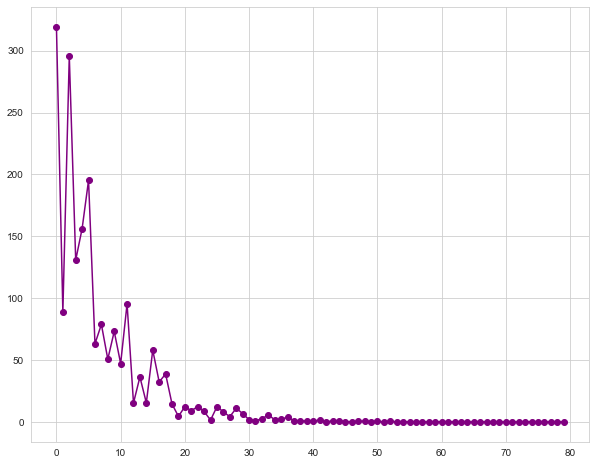

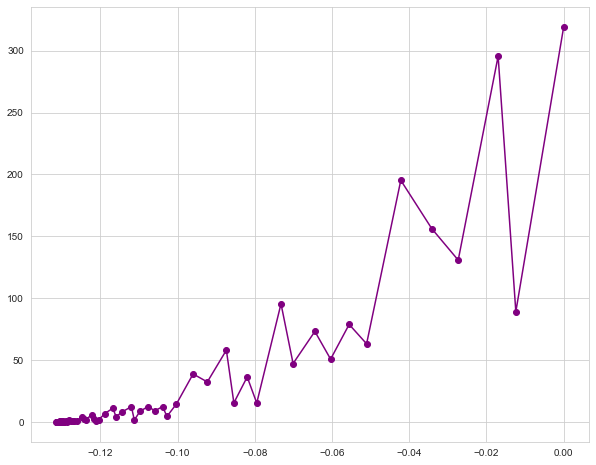

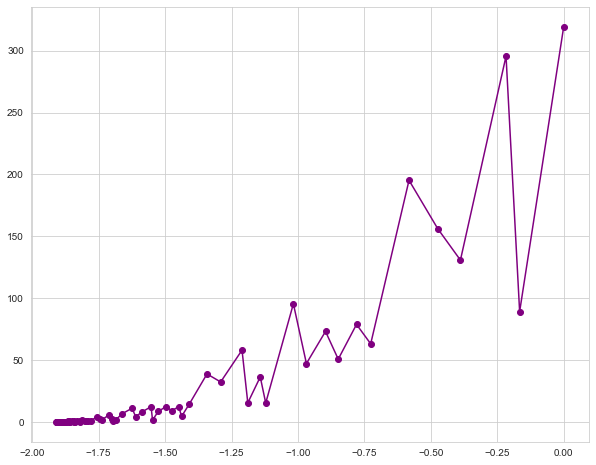

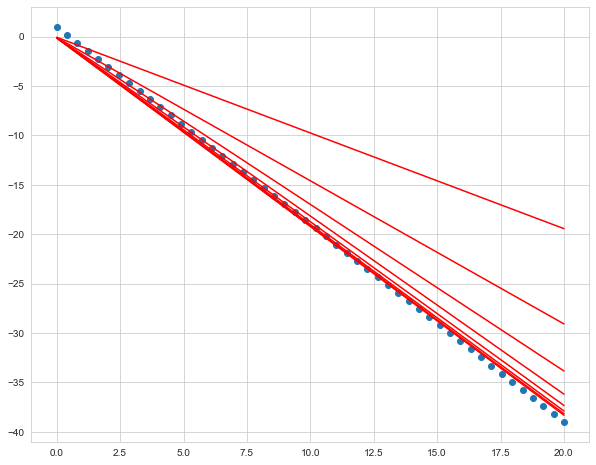

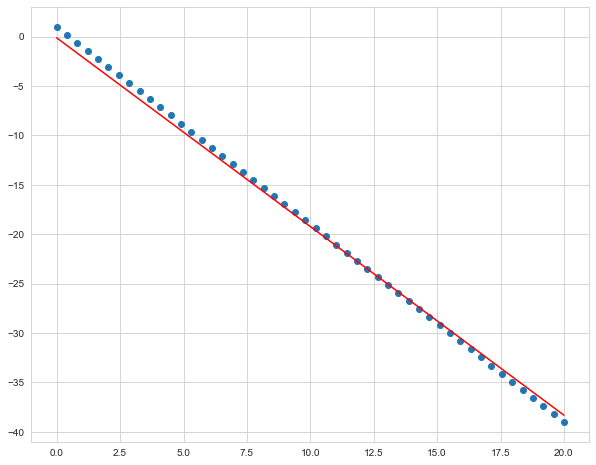

In [183]:
plot_all()

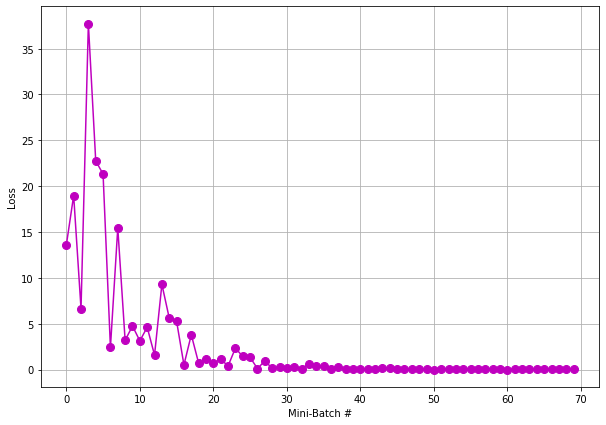

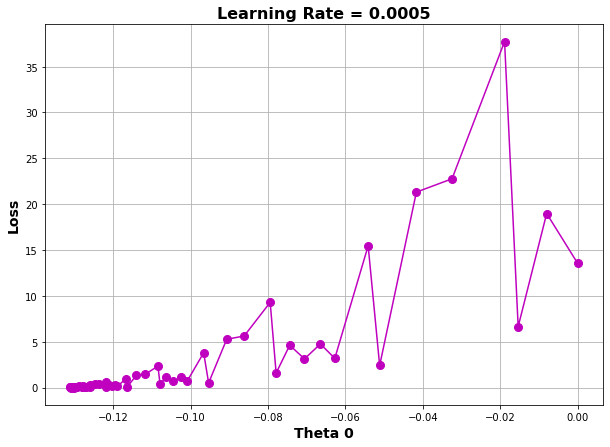

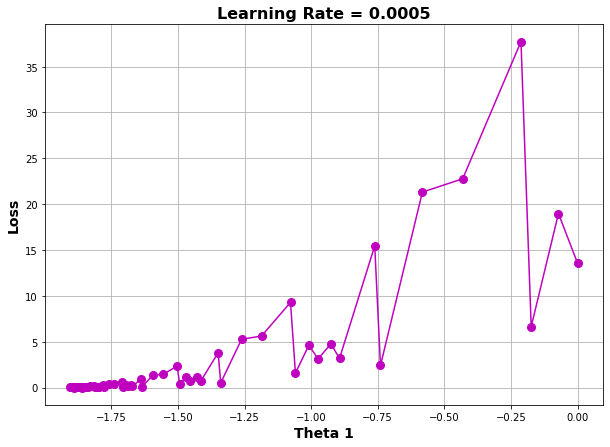

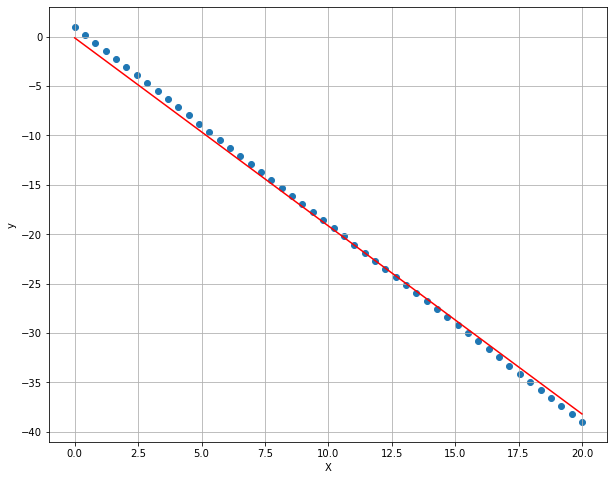

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [49]:
losses, thatas_0, thatas_1, hxs = train(X,y,0.0005,300,10)

168.57496876301542
322.7505873170746
218.82163836647388
219.5210026536948
104.67729985931933
101.29454254169734
124.70310212884415
52.25109546479003
71.92556842680135
88.4145245405783
51.728071430393015
54.43913960646658
40.40290586229655
31.899154960633666
44.56644579585528
25.36768245238197
17.4416225425289
18.963175339528433
22.952475241083004
17.712074036511147
17.75084639621422
9.228582558197068
6.348317790185204
12.012012072117656
10.519117350041748
6.201274582172877
8.318857251539722
9.652173500514504
5.1498416098705135
3.9022750064251093
4.662682791549073
5.513908014700304
1.7951430029356448
2.667933892857167
2.580265830263066
3.1190146605958757
2.0837917321401593
1.4233653723143185
1.4529150048793515
1.003196737375424
1.5758564768445547
1.1020291551498755
0.8977805782568129
0.9884306872553168
0.6542200174601968
1.0336170074935704
0.7126168617352047
0.44141051088711925
0.4497464375145913
0.42955972683907306
0.2917913190662368
0.29087107944135127
0.3059072961411483
0.29392193765

****************** Epoch 0 ********************

Cost = 22.539550396010963

Gradient Vector:
[[ 11.67472803]
 [157.10281459]]

Gradient Vector Norm:
157.53600739932955

theta_0_new : -0.03545598365437756
theta_1_new : -0.48835190145126706

****************** Epoch 1 ********************

Cost = 11.174953219348621

Gradient Vector:
[[  8.09250368]
 [110.51346525]]

Gradient Vector Norm:
110.80936160035174

theta_0_new : -0.06610051885857628
theta_1_new : -0.9107485292034476

****************** Epoch 2 ********************

Cost = 5.548346857077597

Gradient Vector:
[[ 5.57078759]
 [77.71577392]]

Gradient Vector Norm:
77.91517946195926

theta_0_new : -0.0874575404445202
theta_1_new : -1.2081213319692865

****************** Epoch 3 ********************

Cost = 2.763748611613035

Gradient Vector:
[[ 3.7956429 ]
 [54.62706716]]

Gradient Vector Norm:
54.75877438231161

theta_0_new : -0.10227652151342273
theta_1_new : -1.4174804576423325

****************** Epoch 4 ********************

Cos

In [50]:
r2_score(y,hxs[-1])

0.9977599568185135

r2_score 0.9976302004574656


<Figure size 720x576 with 0 Axes>

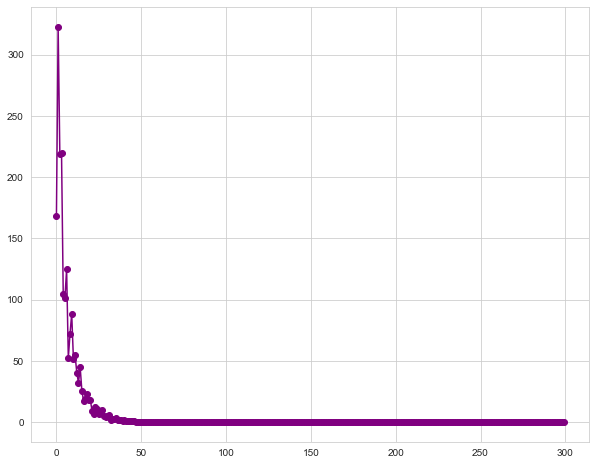

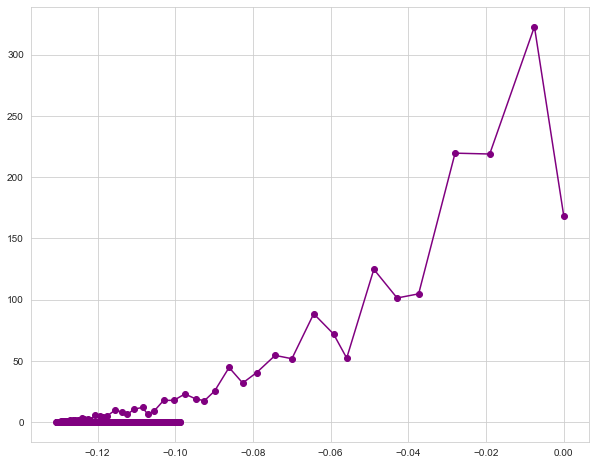

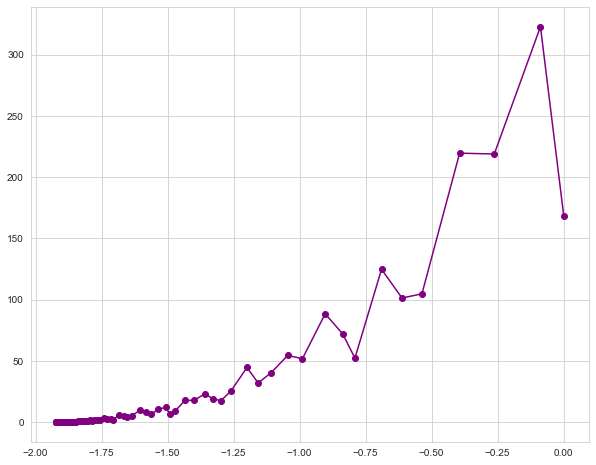

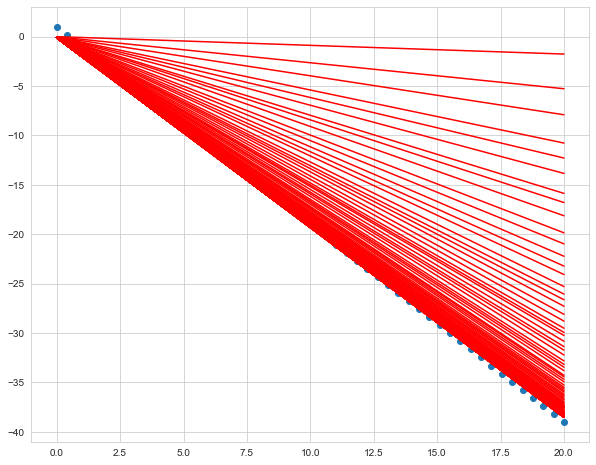

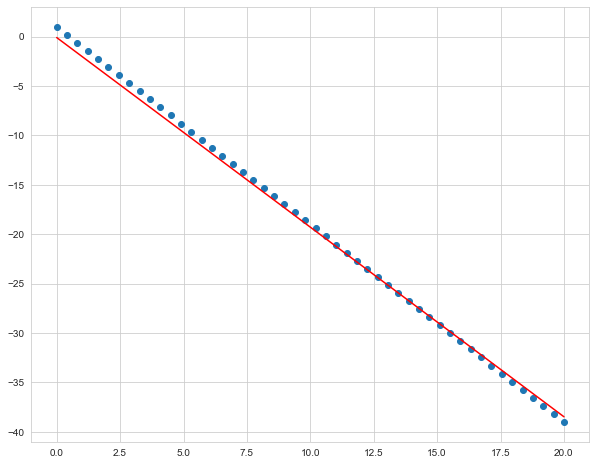

In [51]:
plot_all()

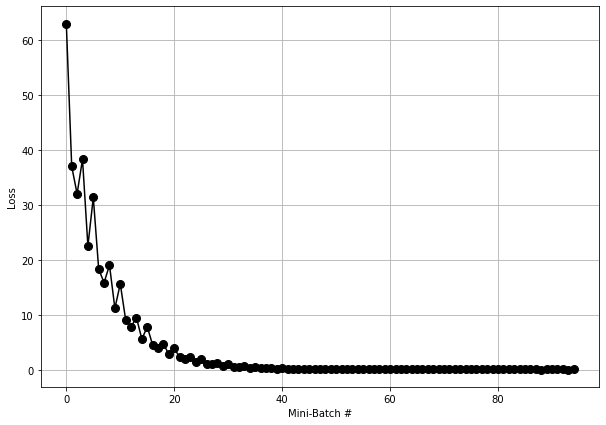

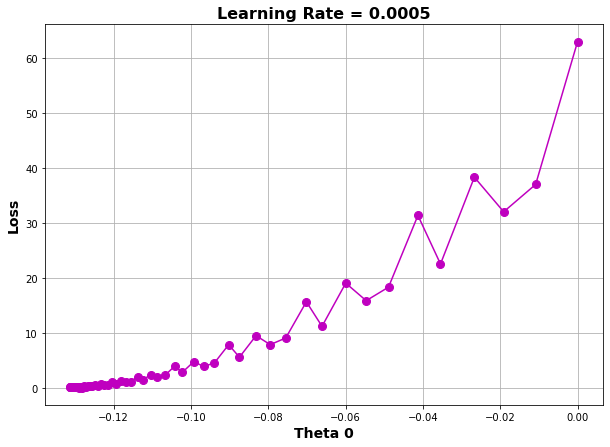

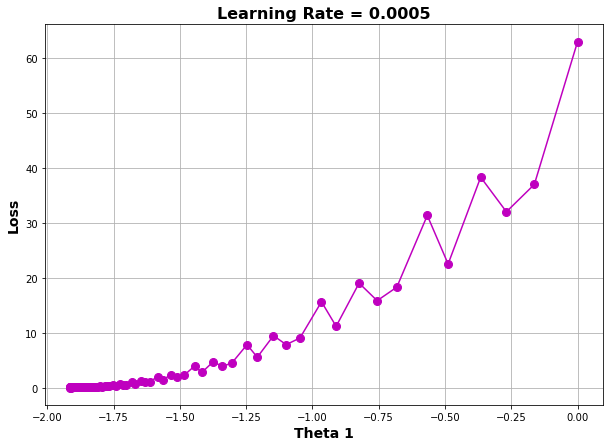

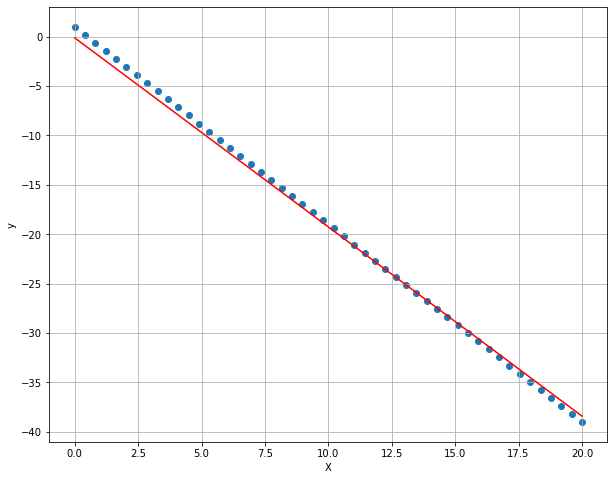

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [61]:
losses, thatas_0, thatas_1, hxs = train(X,y,0.0005,300,30)

263.3204914618909
237.5884123273425
144.67686500984456
151.83067944929397
161.72586340849728
135.69067064194945
95.12459410536803
86.91414587253846
97.61390069265885
80.19851420351046
56.080088401583474
55.906689085326676
39.88104599502938
40.08105902555988
32.95699273553055
35.35924468930245
24.181144917776138
25.04568303333114
16.68741592339379
15.9869894177971
14.537300029550249
12.9188624535511
10.412975684925753
10.941774935971202
10.233162206728915
8.930972805358989
6.859768539293801
6.230352038383397
4.772214976301497
3.700097129383833
4.4025777507561035
3.125653408387656
2.6709698931954975
2.291068698673119
2.6726921980264695
2.1132709823300417
1.709385821588726
1.595283949153436
1.4946110555341932
1.1395863986465495
1.1307098671354894
1.0025090183761654
0.6614912578010625
0.7416114260906923
0.6868534451862612
0.6833810728499691
0.5146311300283045
0.5021387031488099
0.36020177306102497
0.39263374058364725
0.4395204394944175
0.2952774937544118
0.34774197161544484
0.3594880421225

****************** Epoch 0 ********************

Cost = 126.24663174567475

Gradient Vector:
[[ 17.2116263 ]
 [234.92496791]]

Gradient Vector Norm:
235.5546234500846

theta_0_new : -0.009846938775510204
theta_1_new : -0.13470991253644315

****************** Epoch 1 ********************

Cost = 95.2117173776487

Gradient Vector:
[[ 14.90431582]
 [203.99105181]]

Gradient Vector Norm:
204.53480840347603

theta_0_new : -0.026985858149656733
theta_1_new : -0.369149480457521

****************** Epoch 2 ********************

Cost = 71.8119173096046

Gradient Vector:
[[ 12.90081071]
 [177.13009011]]

Gradient Vector Norm:
177.5992672864237

theta_0_new : -0.041830281557401115
theta_1_new : -0.5727240764439553

****************** Epoch 3 ********************

Cost = 54.168934578029884

Gradient Vector:
[[ 11.16111006]
 [153.80581204]]

Gradient Vector Norm:
154.21024024297918

theta_0_new : -0.05468232631950523
theta_1_new : -0.7494975760087796

****************** Epoch 4 ********************

In [62]:
r2_score(y,hxs[-1])

0.9977580512155663

r2_score 0.9975575226128095


<Figure size 720x576 with 0 Axes>

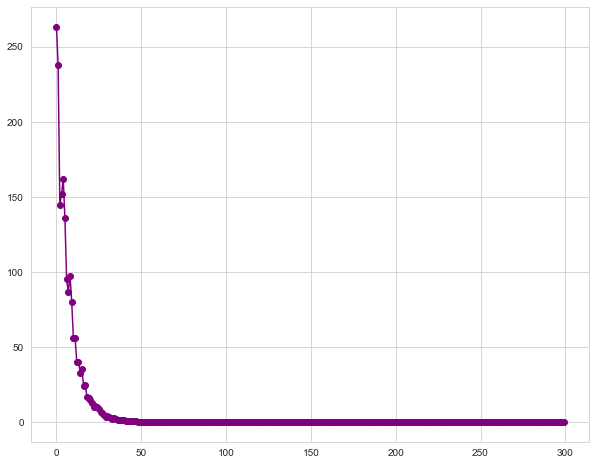

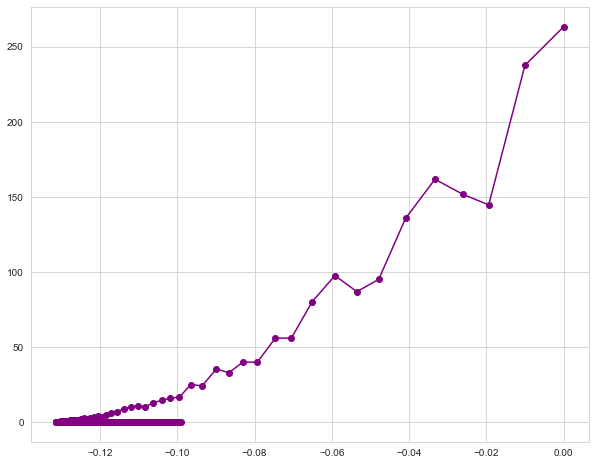

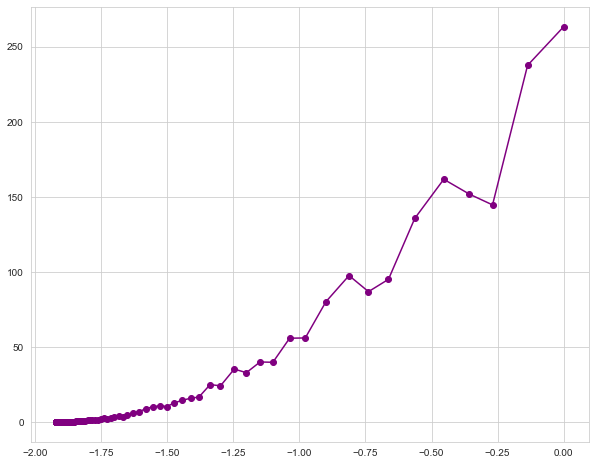

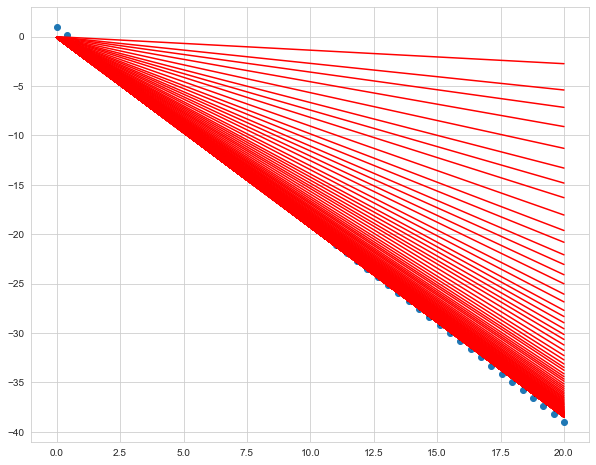

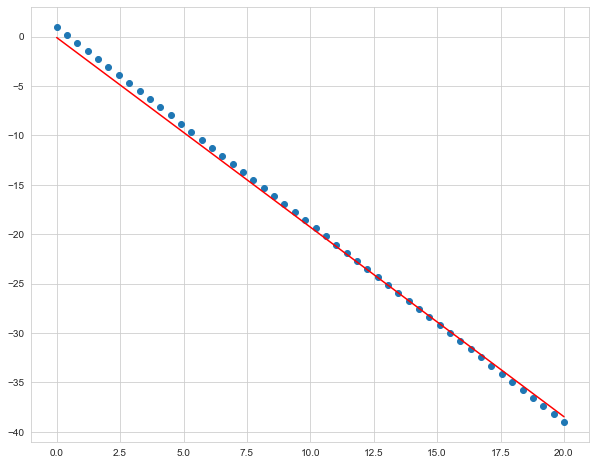

In [63]:
plot_all()

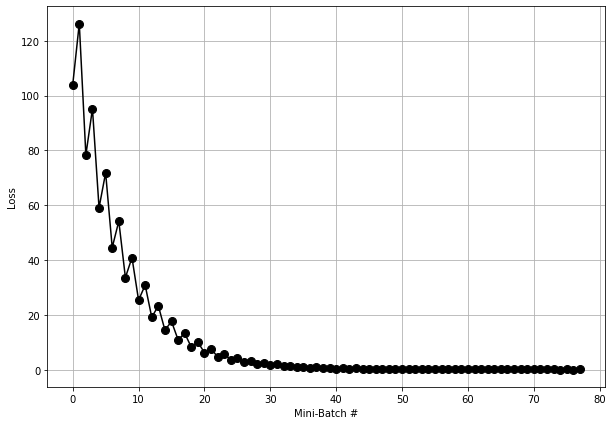

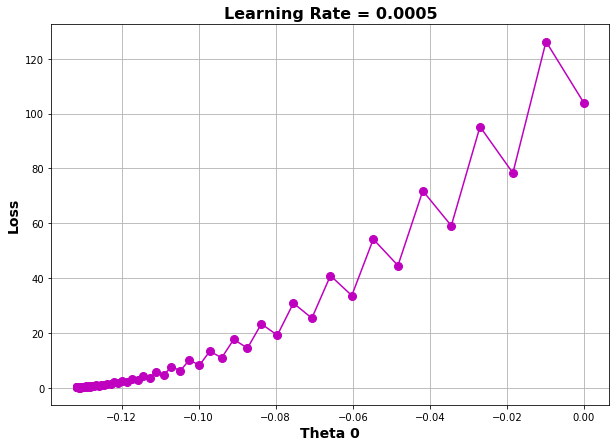

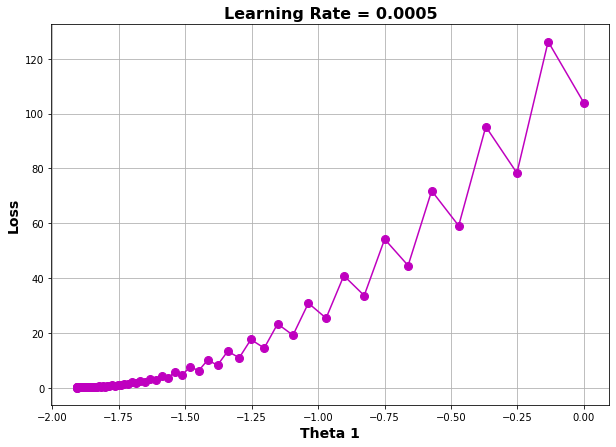

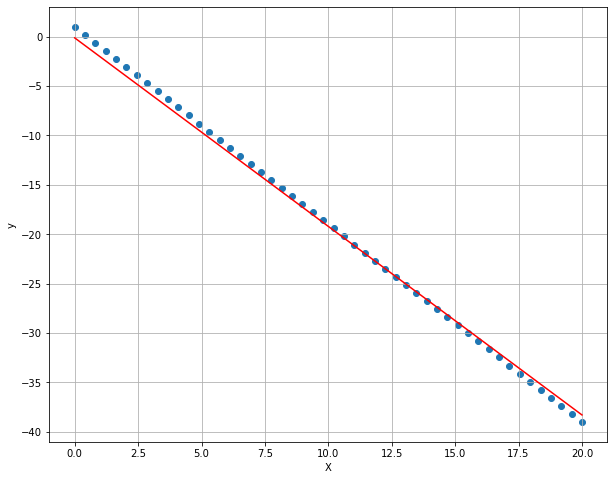